In [56]:
import pandas as pd
import numpy as np

# 다리 각도 추가, 팔 각도에 가중치 추가 후 클러스터링

- 전체 이미지가 아닌 이상한 자세는 제외한 데이터를 사용

In [125]:
# df = pd.read_csv('231002_16h02m_train_scaled.csv')
df = pd.read_csv('231020_21h33m_train_scaled.csv')

In [126]:
df

,keypoint_0,keypoint_1,keypoint_2,keypoint_3,keypoint_4,keypoint_5,keypoint_6,keypoint_7,keypoint_8,keypoint_9,...,keypoint_31,keypoint_32,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg
0,"[0.12309508044034068, 0.6269948409511751, 0.69...","[0.11785156144953496, 0.6223030010662879, 0.68...","[0.11682979400382126, 0.620947434023374, 0.684...","[0.11573459644640499, 0.6200287904734418, 0.68...","[0.11875389026379907, 0.6220894283996901, 0.71...","[0.11835839371023016, 0.6200312601919834, 0.71...","[0.11791487042681864, 0.6179577982471117, 0.71...","[0.1111031758675815, 0.5968232999129846, 0.625...","[0.11324891155235084, 0.5950546996214293, 0.77...","[0.12318370373156379, 0.6180006732813531, 0.68...",...,"[0.8080123944847202, 0.5869754436426441, 0.275...","[0.6936429339863421, 0.5080809271082221, 0.571...",4.839921,2.060280,3.822668,2.667676,7.520909,7.343125,3.808894,3.824501
1,"[0.1188607088191106, 0.6279159220107451, 0.722...","[0.1147755019510247, 0.6234088695808325, 0.709...","[0.11359113768528345, 0.6218008347187545, 0.70...","[0.11216923803965978, 0.620438212388057, 0.709...","[0.11547856058137163, 0.6235527082274366, 0.73...","[0.11468431409474328, 0.6217262199491845, 0.73...","[0.11360433034924056, 0.6197649272168426, 0.73...","[0.10710655994374524, 0.596151616669819, 0.664...","[0.1090934434792667, 0.5948717801168009, 0.804...","[0.11900737904252123, 0.6201882989963914, 0.71...",...,"[0.8157072443195862, 0.5853398187430573, 0.295...","[0.8203266505207076, 0.5511329017643962, 0.447...",5.109820,2.232215,3.830378,3.024879,7.799889,7.470543,3.816605,3.609117
2,"[0.11650652327844385, 0.6829897395791529, 0.70...","[0.1092141538564183, 0.6758822376212059, 0.690...","[0.10786722462441106, 0.6740032093861497, 0.69...","[0.10636441202526864, 0.6727138179963676, 0.69...","[0.11064369310904815, 0.6750931614863158, 0.72...","[0.11050655231894735, 0.6722234121431198, 0.72...","[0.11031804769809511, 0.6690724880421713, 0.72...","[0.10187520634340608, 0.6531593101116036, 0.61...","[0.105046624037967, 0.6444595818386755, 0.7842...","[0.11735230324399698, 0.674694927916016, 0.688...",...,"[0.807822600290672, 0.570703295700455, 0.24514...","[0.6250918405651862, 0.523442990500728, 0.6901...",3.945768,1.687688,3.692830,2.949957,6.323186,6.435285,3.725182,3.595442
3,"[0.11451830489454351, 0.8047396887254219, 0.78...","[0.10567599611531109, 0.8028859103903825, 0.76...","[0.10423012028686895, 0.8023502845181979, 0.76...","[0.10275657948943884, 0.8023419527467985, 0.76...","[0.10694456385884649, 0.8017072923425002, 0.79...","[0.10620546273897141, 0.7995566474690293, 0.79...","[0.10574051076628876, 0.797289159188705, 0.791...","[0.09454377971322897, 0.7924214414240734, 0.68...","[0.09709100814435984, 0.7839974565341393, 0.82...","[0.11192047443644287, 0.7999473814893021, 0.76...",...,"[0.8147498452553316, 0.5352591750351262, 0.193...","[0.8255639970154719, 0.5024597443261054, 0.485...",4.664057,6.587934,3.214495,3.080882,4.207613,4.741305,3.827895,3.472650
4,"[0.13289298318264753, 0.8146822821568005, 0.74...","[0.12433540401002557, 0.8120471132395546, 0.72...","[0.1217288064553857, 0.8121748977612049, 0.724...","[0.11902119178150289, 0.812896614824556, 0.725...","[0.126397127052519, 0.8100381791444186, 0.7539...","[0.12530424675447804, 0.8086458808292813, 0.75...","[0.12421651885581436, 0.807639359751219, 0.753...","[0.10866037120281613, 0.8046858582970016, 0.63...","[0.11240116030535463, 0.7974791203463603, 0.79...","[0.12828987975797052, 0.8144623621430572, 0.72...",...,"[0.8287294599650137, 0.5096290593936211, 0.0]","[0.48244006763996006, 0.5209824589789297, 0.79...",3.005868,5.943385,3.574402,3.669662,4.319027,2.793003,3.924824,3.182336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,"[0.1310998059481897, 0.7043626921703, 0.663064...","[0.12469316846893491, 0.7063100915881207, 0.64...","[0.12338133152288178, 

In [127]:
df.columns

Index(['keypoint_0', 'keypoint_1', 'keypoint_2', 'keypoint_3', 'keypoint_4',
       'keypoint_5', 'keypoint_6', 'keypoint_7', 'keypoint_8', 'keypoint_9',
       'keypoint_10', 'keypoint_11', 'keypoint_12', 'keypoint_13',
       'keypoint_14', 'keypoint_15', 'keypoint_16', 'keypoint_17',
       'keypoint_18', 'keypoint_19', 'keypoint_20', 'keypoint_21',
       'keypoint_22', 'keypoint_23', 'keypoint_24', 'keypoint_25',
       'keypoint_26', 'keypoint_27', 'keypoint_28', 'keypoint_29',
       'keypoint_30', 'keypoint_31', 'keypoint_32', 'angle_right_arm',
       'angle_left_arm', 'angle_right_leg', 'angle_left_leg',
       'xy_angle_right_arm', 'xy_angle_left_arm', 'xy_angle_right_leg',
       'xy_angle_left_leg'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   keypoint_0          210 non-null    object 
 1   keypoint_1          210 non-null    object 
 2   keypoint_2          210 non-null    object 
 3   keypoint_3          210 non-null    object 
 4   keypoint_4          210 non-null    object 
 5   keypoint_5          210 non-null    object 
 6   keypoint_6          210 non-null    object 
 7   keypoint_7          210 non-null    object 
 8   keypoint_8          210 non-null    object 
 9   keypoint_9          210 non-null    object 
 10  keypoint_10         210 non-null    object 
 11  keypoint_11         210 non-null    object 
 12  keypoint_12         210 non-null    object 
 13  keypoint_13         210 non-null    object 
 14  keypoint_14         210 non-null    object 
 15  keypoint_15         210 non-null    object 
 16  keypoint

In [128]:
additional_feature_columns = ["angle_right_arm", "angle_left_arm", "angle_right_leg", "angle_left_leg", "xy_angle_right_arm", "xy_angle_left_arm", "xy_angle_right_leg", "xy_angle_left_leg"]
additional_feature_count = len(additional_feature_columns)

In [129]:
import pandas as pd

def convert_str_to_numbers(df):
    new_df = df.copy()
    for col in new_df.columns[:-additional_feature_count]:
        new_df[col] = new_df[col].apply(lambda x: eval(x))
        temp_df = pd.DataFrame(new_df[col].to_list(), columns=[f'{col}_x', f'{col}_y', f'{col}_z'], index=new_df.index)
        new_df = pd.concat([new_df, temp_df], axis=1)
        new_df.drop(columns=[col], inplace=True)

    return new_df

df = convert_str_to_numbers(df)
df

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg,keypoint_0_x,keypoint_0_y,...,keypoint_29_z,keypoint_30_x,keypoint_30_y,keypoint_30_z,keypoint_31_x,keypoint_31_y,keypoint_31_z,keypoint_32_x,keypoint_32_y,keypoint_32_z
0,4.839921,2.060280,3.822668,2.667676,7.520909,7.343125,3.808894,3.824501,0.123095,0.626995,...,0.301867,0.786852,0.436017,0.552349,0.808012,0.586975,0.275604,0.693643,0.508081,0.571518
1,5.109820,2.232215,3.830378,3.024879,7.799889,7.470543,3.816605,3.609117,0.118861,0.627916,...,0.324799,0.919606,0.464396,0.455173,0.815707,0.585340,0.295687,0.820327,0.551133,0.447887
2,3.945768,1.687688,3.692830,2.949957,6.323186,6.435285,3.725182,3.595442,0.116507,0.682990,...,0.268456,0.736389,0.448207,0.653370,0.807823,0.570703,0.245148,0.625092,0.523443,0.690101
3,4.664057,6.587934,3.214495,3.080882,4.207613,4.741305,3.827895,3.472650,0.114518,0.804740,...,0.204572,0.924244,0.396904,0.460051,0.814750,0.535259,0.193655,0.825564,0.502460,0.485193
4,3.005868,5.943385,3.574402,3.669662,4.319027,2.793003,3.924824,3.182336,0.132893,0.814682,...,0.000000,0.546868,0.459788,0.712767,0.828729,0.509629,0.000000,0.482440,0.520982,0.798002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,3.664198,2.095557,0.897147,3.408949,5.774056,5.856086,0.320804,3.538462,0.131100,0.704363,...,0.463919,0.943437,0.498594,0.444151,0.632351,0.553210,0.547967,0.871628,0.596451,0.480676
604,2.571521,1.709853,0.998612,2.400530,4.349452,4.519678,0.514939,2.435328,0.118161,0.691822,...,0.442848,0.939495,0.424373,0.475187,0.591375,0.586822,0.526817,0.883171,0.543291,0.524153
605,3.240712,1.787738,0.565305,2.887901,5.034888,5.148997,0.405342,2.968946,0.130387,0.693005,...,0.395986,0.949693,0.439335,0.406944,0.584383,0.579875,0.476319,0.883754,0.550965,0.441719
606,2.682319,2.051359,0.700386,2.632107,4.334616,4.895456,0.481344,2.895726,0.128368,0.693939,...,0.388052,0.961505,0.448036,0.369207,0.590470,0.570557,0.475275,0.882750,0.553031,0.407312


In [156]:
df_only_angle = df.copy().iloc[:, :additional_feature_count] # 4번째 컬럼까지만 데이터를 남겨 각도만 가지고 실행
df_only_angle

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg
0,4.839921,2.060280,3.822668,2.667676,7.520909,7.343125,3.808894,3.824501
1,5.109820,2.232215,3.830378,3.024879,7.799889,7.470543,3.816605,3.609117
2,3.945768,1.687688,3.692830,2.949957,6.323186,6.435285,3.725182,3.595442
3,4.664057,6.587934,3.214495,3.080882,4.207613,4.741305,3.827895,3.472650
4,3.005868,5.943385,3.574402,3.669662,4.319027,2.793003,3.924824,3.182336
...,...,...,...,...,...,...,...,...
603,3.664198,2.095557,0.897147,3.408949,5.774056,5.856086,0.320804,3.538462
604,2.571521,1.709853,0.998612,2.400530,4.349452,4.519678,0.514939,2.435328
605,3.240712,1.787738,0.565305,2.887901,5.034888,5.148997,0.405342,2.968946
606,2.682319,2.051359,0.700386,2.632107,4.334616,4.895456,0.481344,2.895726


In [131]:
# 팔 각도에 가중치를 주기 위해 각도를 4배 후 제곱
# df_only_angle.iloc[:, [0,1,4,5]] = np.square(df_only_angle.iloc[:, [0,1,4,5]] * 4)
# df_only_angle

In [132]:
import os

npy_directory = "./npy/561"
f_list = os.listdir(npy_directory)
f_list.sort()

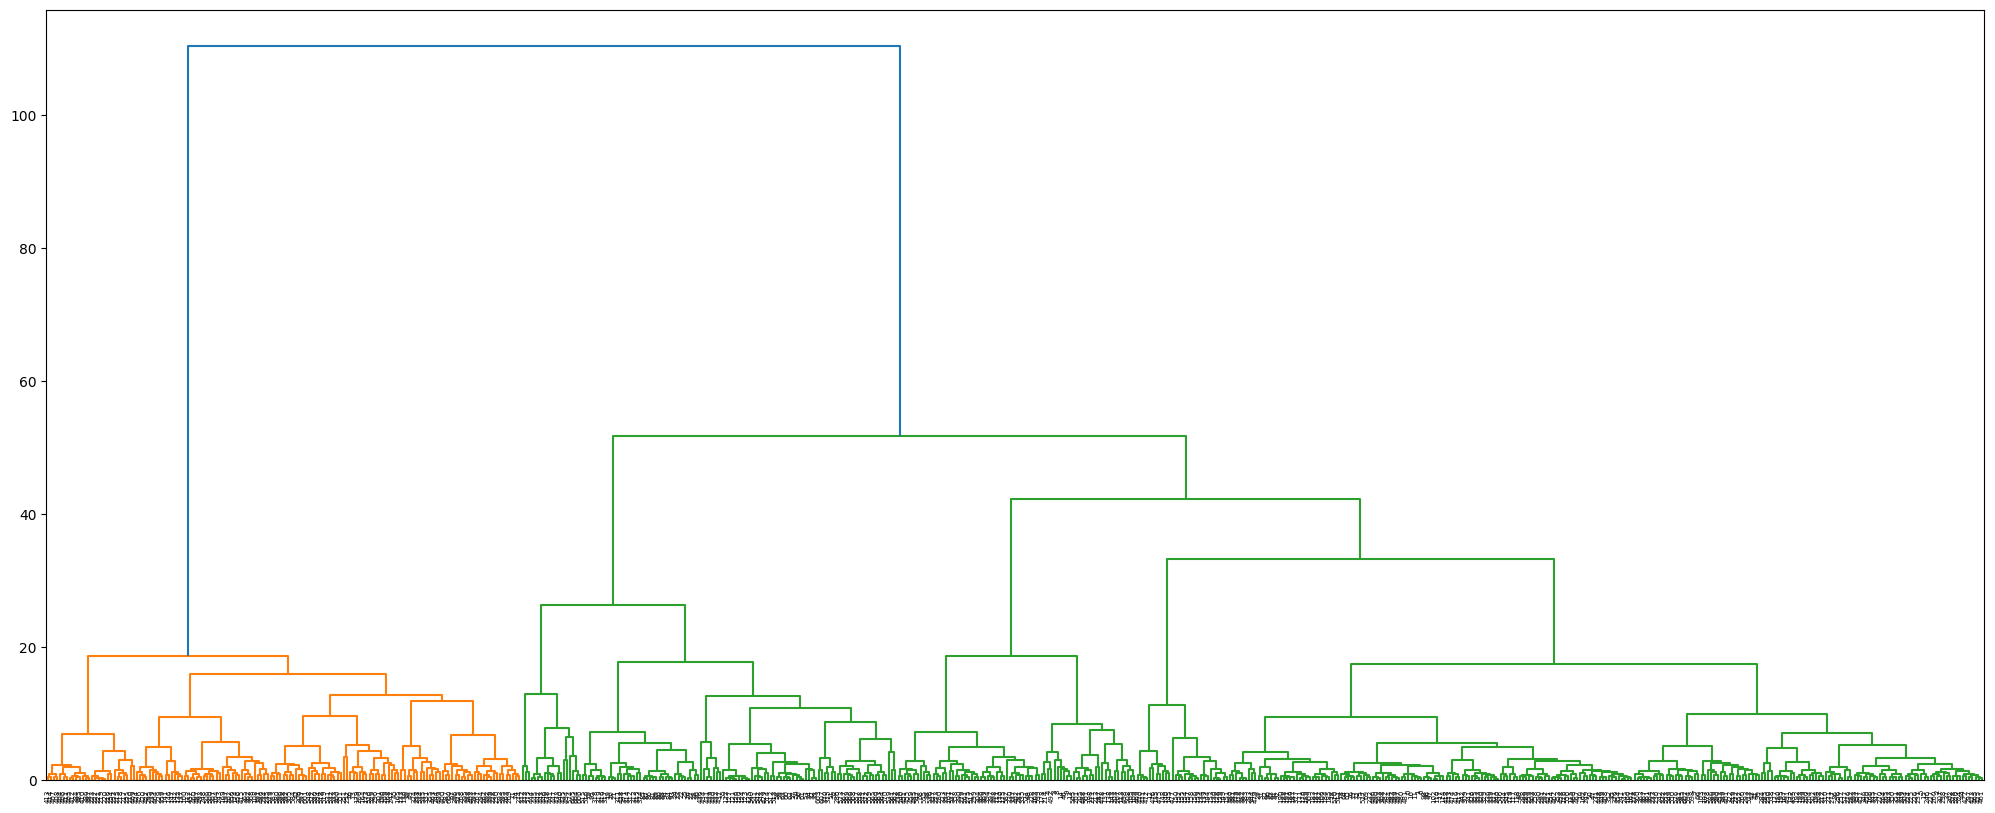

In [158]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Generate the linkage matrix using 'ward' method
Z = linkage(df_only_angle, 'ward')

# Create a dendrogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

plt.show()

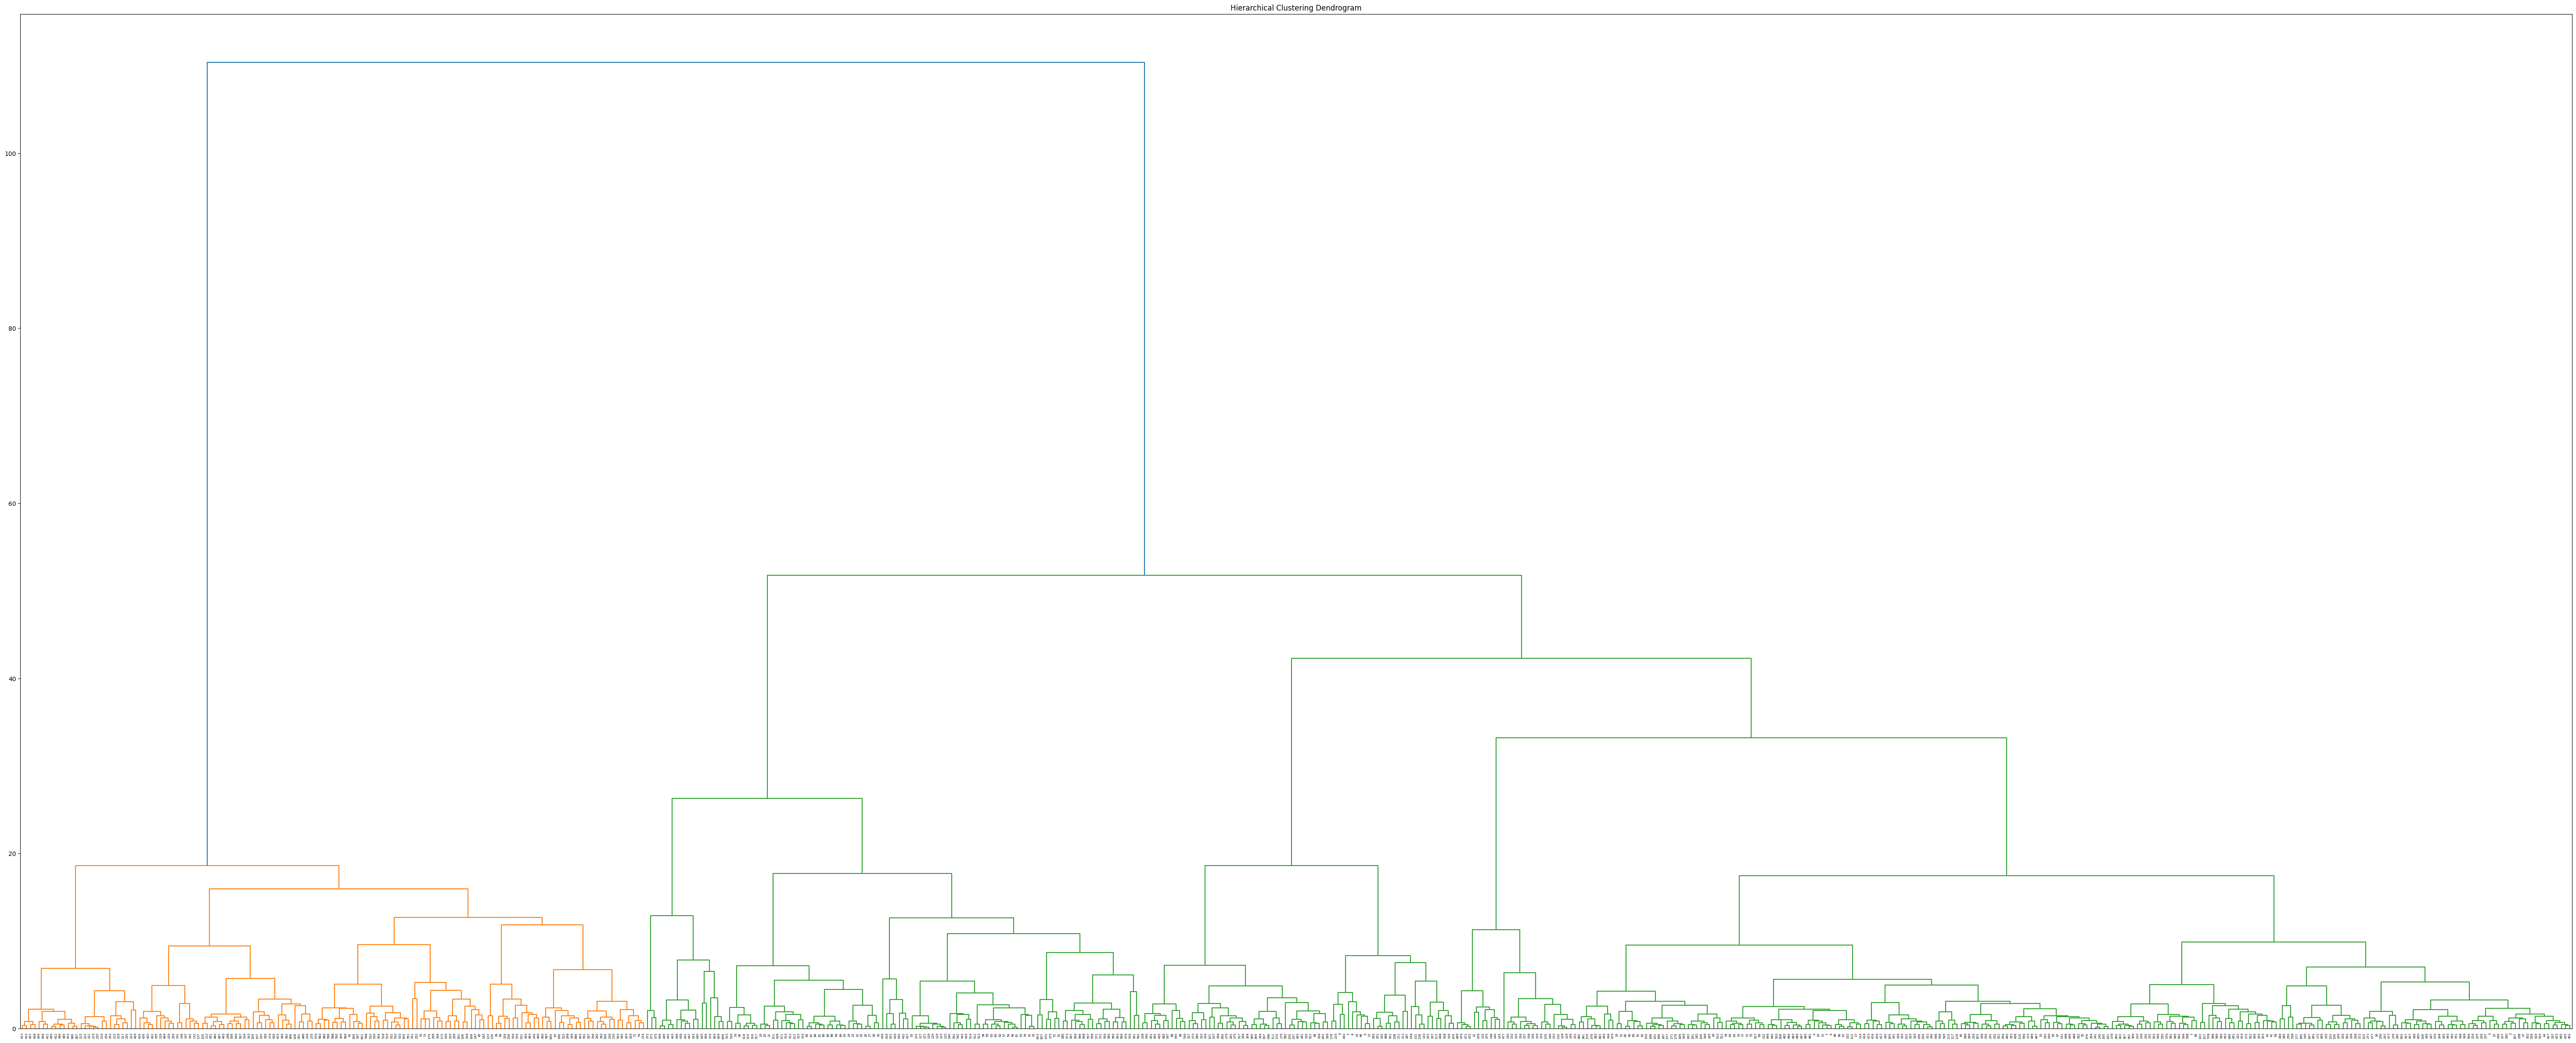

In [162]:
plt.figure(figsize=(75, 30))
plt.title('Hierarchical Clustering Dendrogram')
dn = dendrogram(Z)

plt.show()


In [159]:
from scipy.cluster.hierarchy import fcluster

# Assign cluster labels based on the linkage matrix and a distance threshold
labels = fcluster(Z, t=25, criterion='distance')

# Print cluster labels of each data point
[(f_list, labels) for f_list, labels in zip(f_list, labels)], labels

([('561-1-3-27-Z115_C-0000001.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000002.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000003.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000004.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000005.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000006.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000007.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000008.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000009.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000010.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000011.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000012.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000013.jpg.npy', 5),
  ('561-1-3-27-Z115_C-0000014.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000015.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000016.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000017.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000018.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000019.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000020.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000021.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000022.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000023.jp

In [160]:
labels[381]

6

In [138]:
# label를 df에 추가
df_only_angle['label'] = labels
df_only_angle

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg,label
0,4.839921,2.060280,3.822668,2.667676,7.520909,7.343125,3.808894,3.824501,6
1,5.109820,2.232215,3.830378,3.024879,7.799889,7.470543,3.816605,3.609117,6
2,3.945768,1.687688,3.692830,2.949957,6.323186,6.435285,3.725182,3.595442,6
3,4.664057,6.587934,3.214495,3.080882,4.207613,4.741305,3.827895,3.472650,4
4,3.005868,5.943385,3.574402,3.669662,4.319027,2.793003,3.924824,3.182336,4
...,...,...,...,...,...,...,...,...,...
603,3.664198,2.095557,0.897147,3.408949,5.774056,5.856086,0.320804,3.538462,3
604,2.571521,1.709853,0.998612,2.400530,4.349452,4.519678,0.514939,2.435328,2
605,3.240712,1.787738,0.565305,2.887901,5.034888,5.148997,0.405342,2.968946,2
606,2.682319,2.051359,0.700386,2.632107,4.334616,4.895456,0.481344,2.895726,2


In [170]:
labels[90]

6

In [139]:
df_only_angle['label'] = df_only_angle['label'].replace(6, 0) # 5번 라벨을 0으로 변경

In [140]:
df_only_angle['label'].unique()

array([0, 4, 5, 3, 1, 2], dtype=int32)

In [141]:
df_only_angle.to_csv("./231020_21h53m_train_scaled_with_label_only_angle_ver.csv", index=False)
df_only_angle

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg,label
0,4.839921,2.060280,3.822668,2.667676,7.520909,7.343125,3.808894,3.824501,0
1,5.109820,2.232215,3.830378,3.024879,7.799889,7.470543,3.816605,3.609117,0
2,3.945768,1.687688,3.692830,2.949957,6.323186,6.435285,3.725182,3.595442,0
3,4.664057,6.587934,3.214495,3.080882,4.207613,4.741305,3.827895,3.472650,4
4,3.005868,5.943385,3.574402,3.669662,4.319027,2.793003,3.924824,3.182336,4
...,...,...,...,...,...,...,...,...,...
603,3.664198,2.095557,0.897147,3.408949,5.774056,5.856086,0.320804,3.538462,3
604,2.571521,1.709853,0.998612,2.400530,4.349452,4.519678,0.514939,2.435328,2
605,3.240712,1.787738,0.565305,2.887901,5.034888,5.148997,0.405342,2.968946,2
606,2.682319,2.051359,0.700386,2.632107,4.334616,4.895456,0.481344,2.895726,2


In [57]:
df = pd.read_csv('231003_20h26m_train_scaled.csv')

# 전체 데이터로 위 과정 반복

In [58]:
df

,keypoint_0,keypoint_1,keypoint_2,keypoint_3,keypoint_4,keypoint_5,keypoint_6,keypoint_7,keypoint_8,keypoint_9,...,keypoint_31,keypoint_32,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg
0,"[0.3054861727664331, 0.533810408180248, 0.5649...","[0.2869039391272499, 0.5187053275919721, 0.565...","[0.28451300173876115, 0.5114345425365721, 0.56...","[0.2823542115733646, 0.5037733371707895, 0.565...","[0.28748920333378614, 0.5277222530104483, 0.59...","[0.2845975080521663, 0.5279618857641228, 0.592...","[0.2812241989333655, 0.5277589908370214, 0.592...","[0.2657687656078911, 0.45324703595372084, 0.58...","[0.2547699016282823, 0.4958646733415982, 0.695...","[0.2975861208131576, 0.5074384672155363, 0.567...",...,"[0.8008415031718197, 0.5869754436426441, 0.361...","[0.6178175728821884, 0.5080809271082221, 0.571...",8.573311,4.242233,0.949187,0.664540,15.054359,14.620400,0.948058,0.946929
1,"[0.294977694474587, 0.5350731015802836, 0.5981...","[0.27941542072106573, 0.5202204646317135, 0.60...","[0.27662597395921007, 0.5126123265056524, 0.60...","[0.27365591397849465, 0.504341832998868, 0.600...","[0.2795600153386404, 0.5296993854323845, 0.625...","[0.2757630361556249, 0.5302451848862727, 0.625...","[0.27094366200109277, 0.5301864725209163, 0.62...","[0.25620850171450993, 0.4522993476876077, 0.62...","[0.2454215716736079, 0.4956168412390279, 0.730...","[0.28749699192824707, 0.5105063810452121, 0.60...",...,"[0.8088237618302232, 0.5853398187430573, 0.387...","[0.7758563310260929, 0.5511329017643962, 0.447...",9.188391,4.596256,0.951396,0.761679,15.617442,14.890892,0.950153,0.881795
2,"[0.2891352909583156, 0.6105728040612615, 0.576...","[0.2658765871614981, 0.5921135897838345, 0.574...","[0.2626866556498133, 0.5846571705794846, 0.573...","[0.2594940546646898, 0.5769282350397549, 0.574...","[0.267855369749725, 0.5993390396168805, 0.6034...","[0.2657174402890736, 0.5982705135807102, 0.603...","[0.2631059549952528, 0.5964203732473524, 0.603...","[0.2436946345098714, 0.5327323832034908, 0.574...","[0.23631766262198983, 0.5628018535073505, 0.70...","[0.283498674199403, 0.5869461666639304, 0.5735...",...,"[0.8006446200121392, 0.570703295700455, 0.3213...","[0.5322996391645793, 0.523442990500728, 0.6901...",6.572527,3.475044,0.911983,0.741305,12.637963,12.697907,0.925305,0.877660
3,"[0.2842011114399394, 0.7774776118894076, 0.685...","[0.2572631128834173, 0.7661197815371107, 0.676...","[0.25382929626187045, 0.761789821615688, 0.676...","[0.2506921342154773, 0.756921174295329, 0.6762...","[0.2589002128381761, 0.7704156159792774, 0.702...","[0.2553752977675461, 0.7698025297273714, 0.702...","[0.25218863683109394, 0.7686513683735845, 0.70...","[0.22615720418502372, 0.7292194760431977, 0.64...","[0.21842034731163684, 0.7518574981977839, 0.76...","[0.2703765093773123, 0.7625994934084375, 0.674...",...,"[0.807830603141724, 0.5352591750351262, 0.2538...","[0.7823899547517383, 0.5024597443261054, 0.485...",8.175095,13.564926,0.774920,0.776909,8.375389,9.138281,0.953222,0.840527
4,"[0.3298017164841669, 0.7911077337712982, 0.630...","[0.30268854094673636, 0.7786714344531718, 0.62...","[0.2964434579210651, 0.7753488356200879, 0.621...","[0.2903724192925403, 0.7715766706031519, 0.622...","[0.30599258078440617, 0.781672018266268, 0.647...","[0.30129909047249837, 0.782046736980262, 0.647...","[0.29625348255967365, 0.7825545942700096, 0.64...","[0.25992535766472247, 0.7465235313095133, 0.59...","[0.2528627618700108, 0.7701233966076725, 0.712...","[0.30992157647699137, 0.7829552195178064, 0.61...",...,"[0.8223323676923311, 0.5096290593936211, 0.0]","[0.3543406270920739, 0.5209824589789297, 0.798...",4.548536,12.237764,0.878049,0.937024,8.599637,5.114704,0.979567,0.752735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,"[0.32535157234772494, 0.639872599009511, 0.511...","[0.30355950125713305, 0.6338024234731596, 0.51...","[0.30046781550

In [59]:
df.shape

(320, 41)

In [60]:
df.columns

Index(['keypoint_0', 'keypoint_1', 'keypoint_2', 'keypoint_3', 'keypoint_4',
       'keypoint_5', 'keypoint_6', 'keypoint_7', 'keypoint_8', 'keypoint_9',
       'keypoint_10', 'keypoint_11', 'keypoint_12', 'keypoint_13',
       'keypoint_14', 'keypoint_15', 'keypoint_16', 'keypoint_17',
       'keypoint_18', 'keypoint_19', 'keypoint_20', 'keypoint_21',
       'keypoint_22', 'keypoint_23', 'keypoint_24', 'keypoint_25',
       'keypoint_26', 'keypoint_27', 'keypoint_28', 'keypoint_29',
       'keypoint_30', 'keypoint_31', 'keypoint_32', 'angle_right_arm',
       'angle_left_arm', 'angle_right_leg', 'angle_left_leg',
       'xy_angle_right_arm', 'xy_angle_left_arm', 'xy_angle_right_leg',
       'xy_angle_left_leg'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   keypoint_0          320 non-null    object 
 1   keypoint_1          320 non-null    object 
 2   keypoint_2          320 non-null    object 
 3   keypoint_3          320 non-null    object 
 4   keypoint_4          320 non-null    object 
 5   keypoint_5          320 non-null    object 
 6   keypoint_6          320 non-null    object 
 7   keypoint_7          320 non-null    object 
 8   keypoint_8          320 non-null    object 
 9   keypoint_9          320 non-null    object 
 10  keypoint_10         320 non-null    object 
 11  keypoint_11         320 non-null    object 
 12  keypoint_12         320 non-null    object 
 13  keypoint_13         320 non-null    object 
 14  keypoint_14         320 non-null    object 
 15  keypoint_15         320 non-null    object 
 16  keypoint

In [65]:
additional_feature_columns = ["angle_right_arm", "angle_left_arm", "angle_right_leg", "angle_left_leg", "xy_angle_right_arm", "xy_angle_left_arm", "xy_angle_right_leg", "xy_angle_left_leg"]
additional_feature_count = len(additional_feature_columns)

In [66]:
import pandas as pd

def convert_str_to_numbers(df):
    new_df = df.copy()
    for col in new_df.columns[:-additional_feature_count]:
        new_df[col] = new_df[col].apply(lambda x: eval(x))
        temp_df = pd.DataFrame(new_df[col].to_list(), columns=[f'{col}_x', f'{col}_y', f'{col}_z'], index=new_df.index)
        new_df = pd.concat([new_df, temp_df], axis=1)
        new_df.drop(columns=[col], inplace=True)

    return new_df

df = convert_str_to_numbers(df)
df

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg,keypoint_0_x,keypoint_0_y,...,keypoint_29_z,keypoint_30_x,keypoint_30_y,keypoint_30_z,keypoint_31_x,keypoint_31_y,keypoint_31_z,keypoint_32_x,keypoint_32_y,keypoint_32_z
0,8.573311,4.242233,0.949187,0.664540,15.054359,14.620400,0.948058,0.946929,0.305486,0.533810,...,0.384648,0.704290,0.436017,0.552349,0.800842,0.586975,0.361269,0.617818,0.508081,0.571518
1,9.188391,4.596256,0.951396,0.761679,15.617442,14.890892,0.950153,0.881795,0.294978,0.535073,...,0.413869,0.888466,0.464396,0.455173,0.808824,0.585340,0.387594,0.775856,0.551133,0.447887
2,6.572527,3.475044,0.911983,0.741305,12.637963,12.697907,0.925305,0.877660,0.289135,0.610573,...,0.342074,0.634280,0.448207,0.653370,0.800645,0.570703,0.321347,0.532300,0.523443,0.690101
3,8.175095,13.564926,0.774920,0.776909,8.375389,9.138281,0.953222,0.840527,0.284201,0.777478,...,0.260671,0.894900,0.396904,0.460051,0.807831,0.535259,0.253848,0.782390,0.502460,0.485193
4,4.548536,12.237764,0.878049,0.937024,8.599637,5.114704,0.979567,0.752735,0.329802,0.791108,...,0.000000,0.371350,0.459788,0.712767,0.822332,0.509629,0.000000,0.354341,0.520982,0.798002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,5.956340,4.314870,0.110905,0.866125,11.530758,11.476256,0.000000,0.860429,0.325352,0.639873,...,0.591140,0.921528,0.498594,0.444151,0.618619,0.553210,0.718289,0.839856,0.596451,0.480676
316,3.650885,3.520684,0.139979,0.591891,8.660880,8.675970,0.052766,0.526837,0.293241,0.622680,...,0.564291,0.916059,0.424373,0.475187,0.576113,0.586822,0.690566,0.854255,0.543291,0.524153
317,5.044894,3.681054,0.015818,0.724429,10.041183,9.991034,0.022977,0.688205,0.323582,0.624302,...,0.504577,0.930206,0.439335,0.406944,0.568859,0.579875,0.624371,0.854983,0.550965,0.441719
318,3.877102,4.223864,0.054525,0.654867,8.631016,9.460374,0.043634,0.666064,0.318572,0.625583,...,0.494468,0.946594,0.448036,0.369207,0.575174,0.570557,0.623004,0.853730,0.553031,0.407312


In [67]:
df_only_angle = df.copy().iloc[:, :additional_feature_count] # 각도만 가지고 실행
df_only_angle

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg
0,8.573311,4.242233,0.949187,0.664540,15.054359,14.620400,0.948058,0.946929
1,9.188391,4.596256,0.951396,0.761679,15.617442,14.890892,0.950153,0.881795
2,6.572527,3.475044,0.911983,0.741305,12.637963,12.697907,0.925305,0.877660
3,8.175095,13.564926,0.774920,0.776909,8.375389,9.138281,0.953222,0.840527
4,4.548536,12.237764,0.878049,0.937024,8.599637,5.114704,0.979567,0.752735
...,...,...,...,...,...,...,...,...
315,5.956340,4.314870,0.110905,0.866125,11.530758,11.476256,0.000000,0.860429
316,3.650885,3.520684,0.139979,0.591891,8.660880,8.675970,0.052766,0.526837
317,5.044894,3.681054,0.015818,0.724429,10.041183,9.991034,0.022977,0.688205
318,3.877102,4.223864,0.054525,0.654867,8.631016,9.460374,0.043634,0.666064


In [69]:
import os

npy_directory = "./npy/train_entire"
f_list = os.listdir(npy_directory)
f_list.sort()

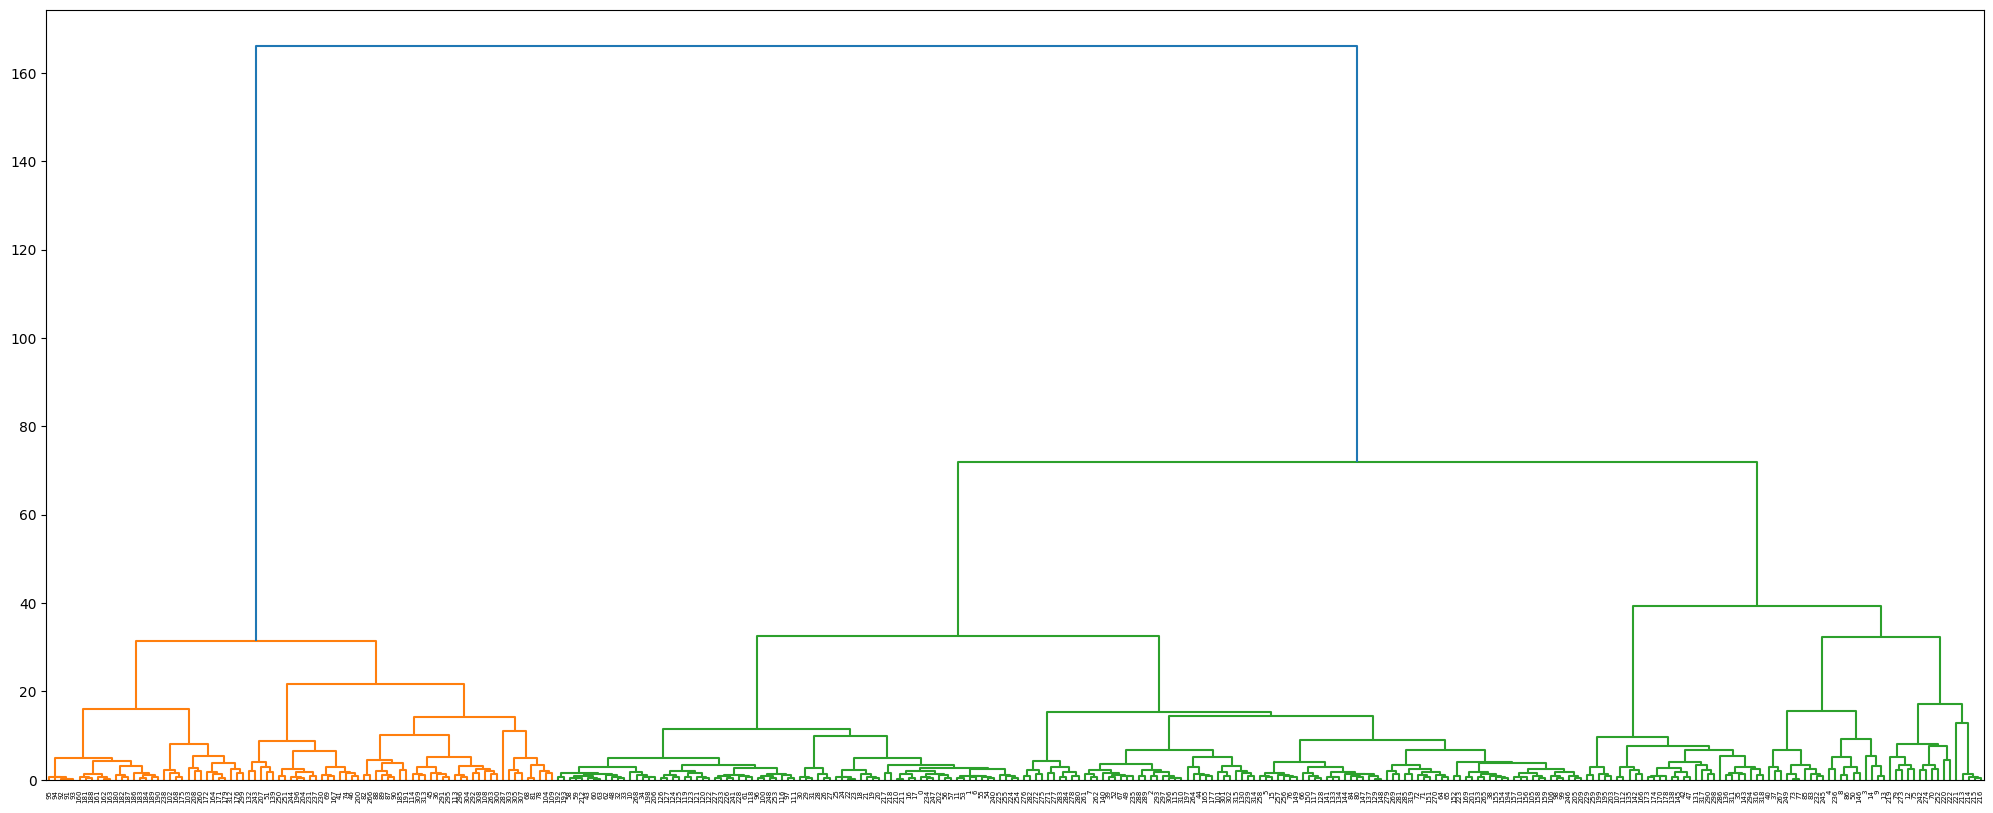

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Generate the linkage matrix using 'ward' method
Z4 = linkage(df_only_angle, 'ward')

# Create a dendrogram
fig4 = plt.figure(figsize=(25, 10))
dn4 = dendrogram(Z4)

plt.show()

In [72]:
from scipy.cluster.hierarchy import fcluster

# Assign cluster labels based on the linkage matrix and a distance threshold
labels4 = fcluster(Z4, t=35, criterion='distance')

# Print cluster labels of each data point
[(f_list, labels) for f_list, labels in zip(f_list, labels4)], labels4

([('561-1-3-27-Z115_C-0000001.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000002.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000003.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000004.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000005.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000006.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000007.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000008.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000009.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000010.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000011.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000012.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000013.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000014.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000015.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000016.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000017.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000018.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000019.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000020.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000021.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000022.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000023.jp

In [73]:
from scipy.cluster.hierarchy import fcluster

# Assign cluster labels based on the linkage matrix and a distance threshold
labels4 = fcluster(Z4, t=30, criterion='distance')

# Print cluster labels of each data point
[(f_list, labels) for f_list, labels in zip(f_list, labels4)], labels4

([('561-1-3-27-Z115_C-0000001.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000002.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000003.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000004.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000005.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000006.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000007.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000008.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000009.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000010.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000011.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000012.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000013.jpg.npy', 7),
  ('561-1-3-27-Z115_C-0000014.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000015.jpg.npy', 6),
  ('561-1-3-27-Z115_C-0000016.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000017.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000018.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000019.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000020.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000021.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000022.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000023.jp

## 다리 각도 가중치 살짝 올려서 시도

In [78]:
df_only_angle = df.copy().iloc[:, :additional_feature_count] # 각도만 가지고 실행
df_only_angle

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg
0,8.573311,4.242233,0.949187,0.664540,15.054359,14.620400,0.948058,0.946929
1,9.188391,4.596256,0.951396,0.761679,15.617442,14.890892,0.950153,0.881795
2,6.572527,3.475044,0.911983,0.741305,12.637963,12.697907,0.925305,0.877660
3,8.175095,13.564926,0.774920,0.776909,8.375389,9.138281,0.953222,0.840527
4,4.548536,12.237764,0.878049,0.937024,8.599637,5.114704,0.979567,0.752735
...,...,...,...,...,...,...,...,...
315,5.956340,4.314870,0.110905,0.866125,11.530758,11.476256,0.000000,0.860429
316,3.650885,3.520684,0.139979,0.591891,8.660880,8.675970,0.052766,0.526837
317,5.044894,3.681054,0.015818,0.724429,10.041183,9.991034,0.022977,0.688205
318,3.877102,4.223864,0.054525,0.654867,8.631016,9.460374,0.043634,0.666064


In [79]:
df_only_angle

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg
0,8.573311,4.242233,0.949187,0.664540,15.054359,14.620400,0.948058,0.946929
1,9.188391,4.596256,0.951396,0.761679,15.617442,14.890892,0.950153,0.881795
2,6.572527,3.475044,0.911983,0.741305,12.637963,12.697907,0.925305,0.877660
3,8.175095,13.564926,0.774920,0.776909,8.375389,9.138281,0.953222,0.840527
4,4.548536,12.237764,0.878049,0.937024,8.599637,5.114704,0.979567,0.752735
...,...,...,...,...,...,...,...,...
315,5.956340,4.314870,0.110905,0.866125,11.530758,11.476256,0.000000,0.860429
316,3.650885,3.520684,0.139979,0.591891,8.660880,8.675970,0.052766,0.526837
317,5.044894,3.681054,0.015818,0.724429,10.041183,9.991034,0.022977,0.688205
318,3.877102,4.223864,0.054525,0.654867,8.631016,9.460374,0.043634,0.666064


In [84]:
# 데이터 전처리 과정에 아래 과정을 추가하여 이제 주석 처리
# df_only_angle.iloc[:, [0,1,4,5]] = df_only_angle.iloc[:, [0,1,4,5]] / 2
# df_only_angle

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg
0,4.286656,2.121117,3.796748,2.658160,7.527179,7.310200,3.792231,3.787714
1,4.594195,2.298128,3.805585,3.046717,7.808721,7.445446,3.800614,3.527182
2,3.286263,1.737522,3.647932,2.965219,6.318982,6.348954,3.701220,3.510640
3,4.087548,6.782463,3.099682,3.107635,4.187695,4.569141,3.812888,3.362109
4,2.274268,6.118882,3.512195,3.748096,4.299818,2.557352,3.918270,3.010942
...,...,...,...,...,...,...,...,...
315,2.978170,2.157435,0.443620,3.464499,5.765379,5.738128,0.000000,3.441716
316,1.825442,1.760342,0.559915,2.367565,4.330440,4.337985,0.211062,2.107349
317,2.522447,1.840527,0.063273,2.897716,5.020592,4.995517,0.091909,2.752822
318,1.938551,2.111932,0.218098,2.619469,4.315508,4.730187,0.174538,2.664254


In [80]:
# 데이터 전처리 과정에 아래 과정을 추가하여 이제 주석 처리
# 다리 각도에 가중치를 살짝 더하기 위해 각도를 2배
# df_only_angle.iloc[:, [2,3,6,7]] = df_only_angle.iloc[:, [2,3,6,7]] * 4
# df_only_angle

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg
0,8.573311,4.242233,3.796748,2.658160,15.054359,14.620400,3.792231,3.787714
1,9.188391,4.596256,3.805585,3.046717,15.617442,14.890892,3.800614,3.527182
2,6.572527,3.475044,3.647932,2.965219,12.637963,12.697907,3.701220,3.510640
3,8.175095,13.564926,3.099682,3.107635,8.375389,9.138281,3.812888,3.362109
4,4.548536,12.237764,3.512195,3.748096,8.599637,5.114704,3.918270,3.010942
...,...,...,...,...,...,...,...,...
315,5.956340,4.314870,0.443620,3.464499,11.530758,11.476256,0.000000,3.441716
316,3.650885,3.520684,0.559915,2.367565,8.660880,8.675970,0.211062,2.107349
317,5.044894,3.681054,0.063273,2.897716,10.041183,9.991034,0.091909,2.752822
318,3.877102,4.223864,0.218098,2.619469,8.631016,9.460374,0.174538,2.664254


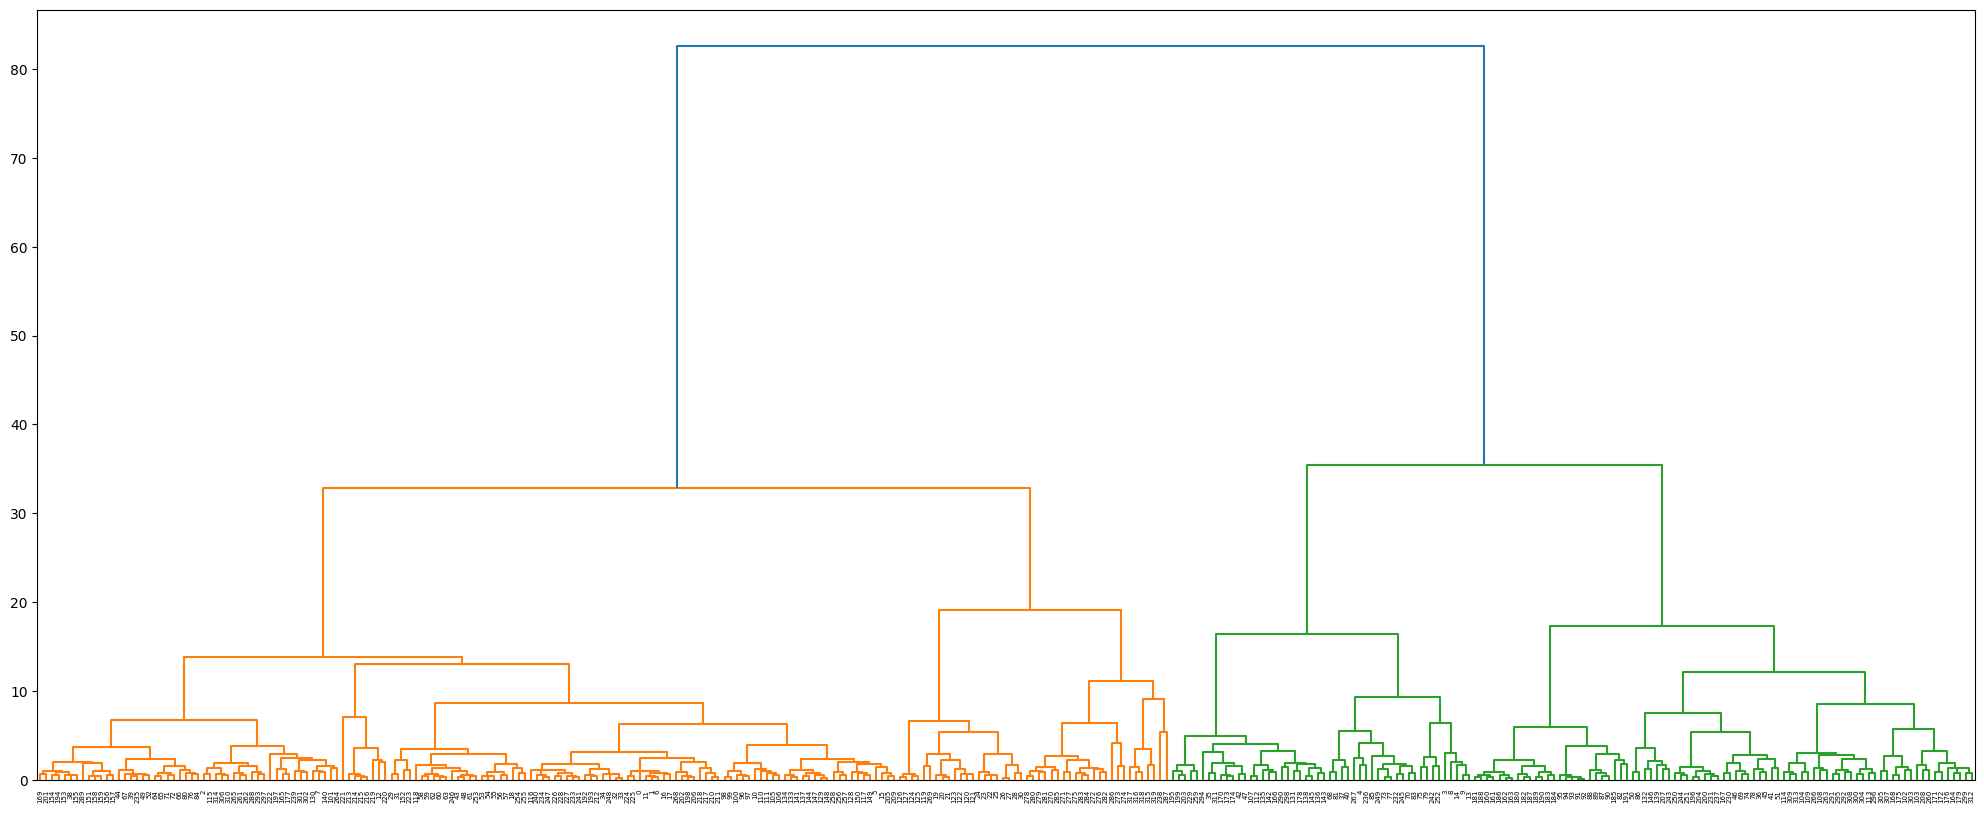

In [85]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Generate the linkage matrix using 'ward' method
Z5 = linkage(df_only_angle, 'ward')

# Create a dendrogram
fig5 = plt.figure(figsize=(25, 10))
dn5 = dendrogram(Z5)

plt.show()

In [86]:
from scipy.cluster.hierarchy import fcluster

# Assign cluster labels based on the linkage matrix and a distance threshold
labels5 = fcluster(Z5, t=30, criterion='distance')

# Print cluster labels of each data point
[(f_list, labels) for f_list, labels in zip(f_list, labels5)], labels5

([('561-1-3-27-Z115_C-0000001.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000002.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000003.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000004.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000005.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000006.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000007.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000008.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000009.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000010.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000011.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000012.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000013.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000014.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000015.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000016.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000017.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000018.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000019.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000020.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000021.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000022.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000023.jp

In [91]:
from scipy.cluster.hierarchy import fcluster

# Assign cluster labels based on the linkage matrix and a distance threshold
labels5 = fcluster(Z5, t=17, criterion='distance')

# Print cluster labels of each data point
[(f_list, labels) for f_list, labels in zip(f_list, labels5)], labels5

([('561-1-3-27-Z115_C-0000001.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000002.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000003.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000004.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000005.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000006.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000007.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000008.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000009.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000010.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000011.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000012.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000013.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000014.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000015.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000016.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000017.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000018.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000019.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000020.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000021.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000022.jpg.npy', 2),
  ('561-1-3-27-Z115_C-0000023.jp

In [124]:
labels5[41]

6

In [92]:
labels5

array([1, 1, 1, 4, 4, 1, 1, 1, 4, 4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 4, 6, 4, 1, 1, 4, 6, 4, 1,
       1, 6, 6, 4, 1, 1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 6, 4, 1, 1, 4, 6, 4, 1, 4, 6, 4, 1, 4, 5, 4, 1, 4, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 6, 6, 6, 1, 1, 4, 6, 6,
       1, 1, 4, 6, 6, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 4,
       6, 1, 1, 4, 4, 1, 4, 6, 1, 1, 4, 4, 1, 4, 6, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 6, 1, 4, 6, 6, 1, 4, 6, 6, 4, 4, 6,
       6, 1, 4, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 4, 6, 1,
       1, 4, 6, 1, 1, 4, 6, 1, 1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 6, 6, 4, 1, 1, 1, 4, 6, 3, 1, 1, 1,
       4, 6, 6, 4, 1, 1, 1, 4, 6, 6, 4, 1, 1, 1, 1, 1, 1, 4, 6, 1, 1, 6,
       1, 1, 6, 4, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 4, 6, 6, 1, 4, 6, 6, 1, 4, 6, 6,

## label 저장

In [94]:
# label를 df에 추가
df_only_angle['label'] = labels5
df_only_angle

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg,label
0,4.286656,2.121117,3.796748,2.658160,7.527179,7.310200,3.792231,3.787714,1
1,4.594195,2.298128,3.805585,3.046717,7.808721,7.445446,3.800614,3.527182,1
2,3.286263,1.737522,3.647932,2.965219,6.318982,6.348954,3.701220,3.510640,1
3,4.087548,6.782463,3.099682,3.107635,4.187695,4.569141,3.812888,3.362109,4
4,2.274268,6.118882,3.512195,3.748096,4.299818,2.557352,3.918270,3.010942,4
...,...,...,...,...,...,...,...,...,...
315,2.978170,2.157435,0.443620,3.464499,5.765379,5.738128,0.000000,3.441716,3
316,1.825442,1.760342,0.559915,2.367565,4.330440,4.337985,0.211062,2.107349,3
317,2.522447,1.840527,0.063273,2.897716,5.020592,4.995517,0.091909,2.752822,3
318,1.938551,2.111932,0.218098,2.619469,4.315508,4.730187,0.174538,2.664254,3


In [95]:
df_only_angle['label'] = df_only_angle['label'].replace(6, 0) # 6번 라벨을 0으로 변경

In [96]:
df_only_angle.to_csv("./231003_23h07m_train_scaled_with_label_only_angle_ver.csv", index=False)
df_only_angle

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg,label
0,4.286656,2.121117,3.796748,2.658160,7.527179,7.310200,3.792231,3.787714,1
1,4.594195,2.298128,3.805585,3.046717,7.808721,7.445446,3.800614,3.527182,1
2,3.286263,1.737522,3.647932,2.965219,6.318982,6.348954,3.701220,3.510640,1
3,4.087548,6.782463,3.099682,3.107635,4.187695,4.569141,3.812888,3.362109,4
4,2.274268,6.118882,3.512195,3.748096,4.299818,2.557352,3.918270,3.010942,4
...,...,...,...,...,...,...,...,...,...
315,2.978170,2.157435,0.443620,3.464499,5.765379,5.738128,0.000000,3.441716,3
316,1.825442,1.760342,0.559915,2.367565,4.330440,4.337985,0.211062,2.107349,3
317,2.522447,1.840527,0.063273,2.897716,5.020592,4.995517,0.091909,2.752822,3
318,1.938551,2.111932,0.218098,2.619469,4.315508,4.730187,0.174538,2.664254,3


# 팔, 다리 각도에 팔, 다리 기울기까지 추가

In [97]:
# TODO

# 다른 테스트

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_only_angle)

/Users/hou27/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [18]:
labels = kmeans.labels_ # 각 데이터 포인트가 속한 클러스터의 레이블
centers = kmeans.cluster_centers_ # 각 클러스터의 중심점

print("Labels: ", labels)
# print("Cluster Centers: ", centers)

Labels:  [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 3 3 2 2 3 3 2 2 2 3 3 2 2 2 3
 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 3 2 2 3 2 2 3 1 2 0 0 0 0 0 0 1
 1 1 0 0 0 1 1 2 0 0 1 1 0 2 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0
 2 2 2 0 2 2 2 2 2 1 1 1 1 1 2 0 3 1 0 2 1 1 2 2 1 1 2 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 3 0 0 2 3 2 0 2 3 0 0 3 1 0 0 0 0 0 0 0 2 0 3 3 2 0 2 3 3 3
 2 2 2 3 3 2 2 2 3 3 2 2 2 0 0 0 0 1 0 0 1 0 0 1 0]


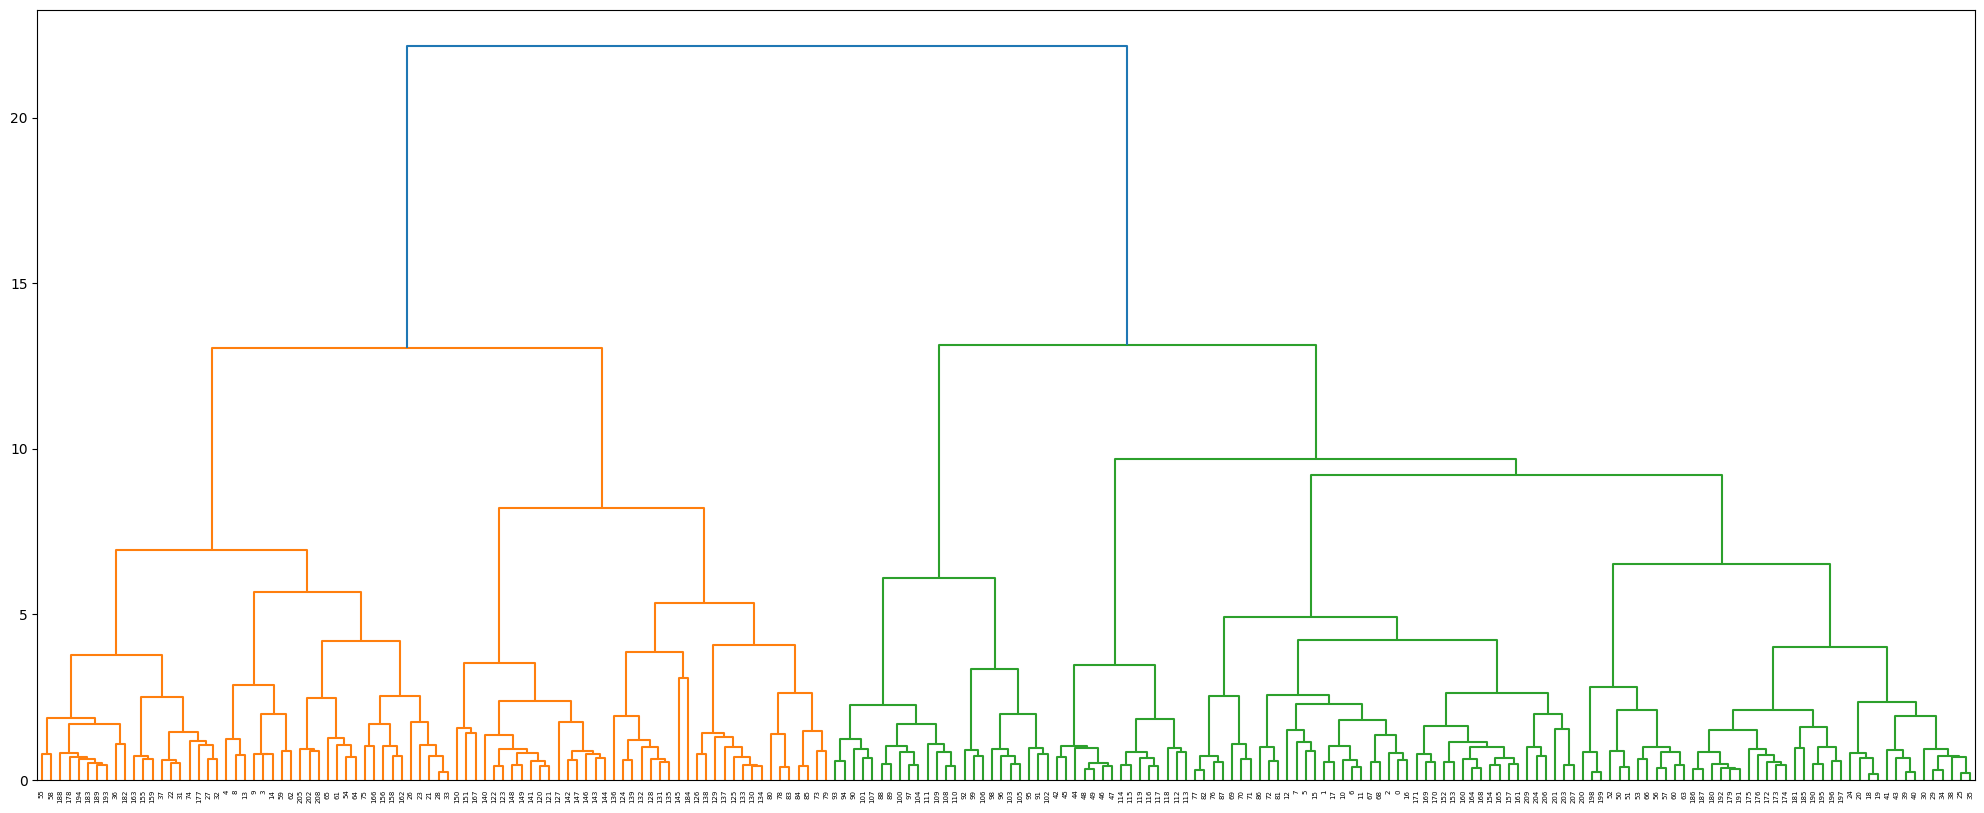

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Generate the linkage matrix using 'ward' method
Z = linkage(df, 'ward')

# Create a dendrogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

plt.show()

In [9]:
f_list = ['561-1-3-27-Z115_C-0000001.jpg.npy',
 '561-1-3-27-Z115_C-0000002.jpg.npy',
 '561-1-3-27-Z115_C-0000003.jpg.npy',
 '561-1-3-27-Z115_C-0000004.jpg.npy',
 '561-1-3-27-Z115_C-0000005.jpg.npy',
 '561-1-3-27-Z115_C-0000006.jpg.npy',
 '561-1-3-27-Z115_C-0000007.jpg.npy',
 '561-1-3-27-Z115_C-0000008.jpg.npy',
 '561-1-3-27-Z115_C-0000009.jpg.npy',
 '561-1-3-27-Z115_C-0000010.jpg.npy',
 '561-1-3-27-Z115_C-0000011.jpg.npy',
 '561-1-3-27-Z115_C-0000012.jpg.npy',
 '561-1-3-27-Z115_C-0000013.jpg.npy',
 '561-1-3-27-Z115_C-0000014.jpg.npy',
 '561-1-3-27-Z115_C-0000015.jpg.npy',
 '561-1-3-27-Z115_C-0000016.jpg.npy',
 '561-1-3-27-Z115_C-0000017.jpg.npy',
 '561-1-3-27-Z115_C-0000018.jpg.npy',
 '561-1-3-27-Z37_C-0000001.jpg.npy',
 '561-1-3-27-Z37_C-0000002.jpg.npy',
 '561-1-3-27-Z37_C-0000003.jpg.npy',
 '561-1-3-27-Z37_C-0000004.jpg.npy',
 '561-1-3-27-Z37_C-0000005.jpg.npy',
 '561-1-3-27-Z37_C-0000006.jpg.npy',
 '561-1-3-27-Z37_C-0000007.jpg.npy',
 '561-1-3-27-Z37_C-0000008.jpg.npy',
 '561-1-3-27-Z37_C-0000009.jpg.npy',
 '561-1-3-27-Z37_C-0000010.jpg.npy',
 '561-1-3-27-Z37_C-0000011.jpg.npy',
 '561-1-3-27-Z37_C-0000012.jpg.npy',
 '561-1-3-27-Z37_C-0000013.jpg.npy',
 '561-1-3-27-Z37_C-0000014.jpg.npy',
 '561-1-3-27-Z37_C-0000015.jpg.npy',
 '561-1-3-27-Z37_C-0000016.jpg.npy',
 '561-1-3-27-Z37_C-0000017.jpg.npy',
 '561-1-3-27-Z37_C-0000018.jpg.npy',
 '561-1-3-27-Z37_C-0000019.jpg.npy',
 '561-1-3-27-Z37_C-0000020.jpg.npy',
 '561-1-3-27-Z37_C-0000021.jpg.npy',
 '561-1-3-27-Z37_C-0000022.jpg.npy',
 '561-1-3-27-Z37_C-0000023.jpg.npy',
 '561-1-3-27-Z37_C-0000024.jpg.npy',
 '561-1-3-27-Z37_C-0000025.jpg.npy',
 '561-1-3-27-Z37_C-0000026.jpg.npy',
 '561-1-3-27-Z37_C-0000027.jpg.npy',
 '561-1-3-27-Z37_C-0000028.jpg.npy',
 '561-1-3-27-Z37_C-0000029.jpg.npy',
 '561-1-3-27-Z37_C-0000030.jpg.npy',
 '561-1-3-27-Z37_C-0000031.jpg.npy',
 '561-1-3-27-Z37_C-0000032.jpg.npy',
 '561-1-3-27-Z3_C-0000001.jpg.npy',
 '561-1-3-27-Z3_C-0000002.jpg.npy',
 '561-1-3-27-Z3_C-0000003.jpg.npy',
 '561-1-3-27-Z3_C-0000004.jpg.npy',
 '561-1-3-27-Z3_C-0000005.jpg.npy',
 '561-1-3-27-Z3_C-0000006.jpg.npy',
 '561-1-3-27-Z3_C-0000008.jpg.npy',
 '561-1-3-27-Z3_C-0000009.jpg.npy',
 '561-1-3-27-Z3_C-0000011.jpg.npy',
 '561-1-3-27-Z3_C-0000012.jpg.npy',
 '561-1-3-27-Z3_C-0000013.jpg.npy',
 '561-1-3-27-Z3_C-0000015.jpg.npy',
 '561-1-3-27-Z3_C-0000016.jpg.npy',
 '561-1-3-27-Z3_C-0000017.jpg.npy',
 '561-1-3-27-Z3_C-0000018.jpg.npy',
 '561-1-3-27-Z3_C-0000019.jpg.npy',
 '561-1-3-27-Z3_C-0000021.jpg.npy',
 '561-1-3-27-Z54_C-0000001.jpg.npy',
 '561-1-3-27-Z54_C-0000002.jpg.npy',
 '561-1-3-27-Z54_C-0000003.jpg.npy',
 '561-1-3-27-Z54_C-0000004.jpg.npy',
 '561-1-3-27-Z54_C-0000005.jpg.npy',
 '561-1-3-27-Z54_C-0000006.jpg.npy',
 '561-1-3-27-Z54_C-0000007.jpg.npy',
 '561-1-3-27-Z54_C-0000008.jpg.npy',
 '561-1-3-27-Z54_C-0000009.jpg.npy',
 '561-1-3-27-Z54_C-0000010.jpg.npy',
 '561-1-3-27-Z54_C-0000011.jpg.npy',
 '561-1-3-27-Z54_C-0000012.jpg.npy',
 '561-1-3-27-Z54_C-0000013.jpg.npy',
 '561-1-3-27-Z54_C-0000014.jpg.npy',
 '561-1-3-27-Z54_C-0000015.jpg.npy',
 '561-1-3-27-Z54_C-0000016.jpg.npy',
 '561-1-3-27-Z54_C-0000017.jpg.npy',
 '561-1-3-27-Z54_C-0000018.jpg.npy',
 '561-1-3-27-Z54_C-0000019.jpg.npy',
 '561-1-3-27-Z54_C-0000020.jpg.npy',
 '561-1-3-27-Z54_C-0000021.jpg.npy',
 '561-1-3-27-Z56_C-0000001.jpg.npy',
 '561-1-3-27-Z56_C-0000002.jpg.npy',
 '561-1-3-27-Z56_C-0000003.jpg.npy',
 '561-1-3-27-Z56_C-0000004.jpg.npy',
 '561-1-3-27-Z56_C-0000005.jpg.npy',
 '561-1-3-27-Z56_C-0000006.jpg.npy',
 '561-1-3-27-Z56_C-0000007.jpg.npy',
 '561-1-3-27-Z56_C-0000008.jpg.npy',
 '561-1-3-27-Z56_C-0000009.jpg.npy',
 '561-1-3-27-Z56_C-0000010.jpg.npy',
 '561-1-3-27-Z56_C-0000011.jpg.npy',
 '561-1-3-27-Z56_C-0000012.jpg.npy',
 '561-1-3-27-Z56_C-0000013.jpg.npy',
 '561-1-3-27-Z56_C-0000014.jpg.npy',
 '561-1-3-27-Z56_C-0000015.jpg.npy',
 '561-1-3-27-Z56_C-0000016.jpg.npy',
 '561-1-3-27-Z56_C-0000017.jpg.npy',
 '561-1-3-27-Z56_C-0000018.jpg.npy',
 '561-1-3-27-Z56_C-0000019.jpg.npy',
 '561-1-3-27-Z56_C-0000020.jpg.npy',
 '561-1-3-27-Z56_C-0000021.jpg.npy',
 '561-1-3-27-Z56_C-0000022.jpg.npy',
 '561-1-3-27-Z56_C-0000023.jpg.npy',
 '561-1-3-27-Z56_C-0000024.jpg.npy',
 '561-1-3-27-Z56_C-0000025.jpg.npy',
 '561-1-3-27-Z56_C-0000026.jpg.npy',
 '561-1-3-27-Z56_C-0000027.jpg.npy',
 '561-1-3-27-Z56_C-0000028.jpg.npy',
 '561-1-3-27-Z56_C-0000029.jpg.npy',
 '561-1-3-27-Z56_C-0000030.jpg.npy',
 '561-1-3-27-Z56_C-0000031.jpg.npy',
 '561-1-3-27-Z56_C-0000032.jpg.npy',
 '561-1-3-27-Z59_C-0000001.jpg.npy',
 '561-1-3-27-Z59_C-0000002.jpg.npy',
 '561-1-3-27-Z59_C-0000003.jpg.npy',
 '561-1-3-27-Z59_C-0000004.jpg.npy',
 '561-1-3-27-Z59_C-0000005.jpg.npy',
 '561-1-3-27-Z59_C-0000006.jpg.npy',
 '561-1-3-27-Z59_C-0000007.jpg.npy',
 '561-1-3-27-Z59_C-0000008.jpg.npy',
 '561-1-3-27-Z59_C-0000009.jpg.npy',
 '561-1-3-27-Z59_C-0000010.jpg.npy',
 '561-1-3-27-Z59_C-0000011.jpg.npy',
 '561-1-3-27-Z59_C-0000012.jpg.npy',
 '561-1-3-27-Z59_C-0000013.jpg.npy',
 '561-1-3-27-Z59_C-0000014.jpg.npy',
 '561-1-3-27-Z59_C-0000015.jpg.npy',
 '561-1-3-27-Z59_C-0000016.jpg.npy',
 '561-1-3-27-Z59_C-0000017.jpg.npy',
 '561-1-3-27-Z59_C-0000018.jpg.npy',
 '561-1-3-27-Z59_C-0000019.jpg.npy',
 '561-1-3-27-Z59_C-0000020.jpg.npy',
 '561-1-3-27-Z59_C-0000021.jpg.npy',
 '561-1-3-27-Z59_C-0000022.jpg.npy',
 '561-1-3-27-Z59_C-0000023.jpg.npy',
 '561-1-3-27-Z59_C-0000024.jpg.npy',
 '561-1-3-27-Z59_C-0000025.jpg.npy',
 '561-1-3-27-Z59_C-0000026.jpg.npy',
 '561-1-3-27-Z59_C-0000027.jpg.npy',
 '561-1-3-27-Z59_C-0000028.jpg.npy',
 '561-1-3-27-Z59_C-0000029.jpg.npy',
 '561-1-3-27-Z59_C-0000030.jpg.npy',
 '561-1-3-27-Z59_C-0000031.jpg.npy',
 '561-1-3-27-Z59_C-0000032.jpg.npy',
 '561-1-3-27-Z61_C-0000001.jpg.npy',
 '561-1-3-27-Z61_C-0000002.jpg.npy',
 '561-1-3-27-Z61_C-0000003.jpg.npy',
 '561-1-3-27-Z61_C-0000005.jpg.npy',
 '561-1-3-27-Z61_C-0000006.jpg.npy',
 '561-1-3-27-Z61_C-0000007.jpg.npy',
 '561-1-3-27-Z61_C-0000008.jpg.npy',
 '561-1-3-27-Z61_C-0000009.jpg.npy',
 '561-1-3-27-Z61_C-0000010.jpg.npy',
 '561-1-3-27-Z61_C-0000011.jpg.npy',
 '561-1-3-27-Z61_C-0000012.jpg.npy',
 '561-1-3-27-Z61_C-0000013.jpg.npy',
 '561-1-3-27-Z61_C-0000014.jpg.npy',
 '561-1-3-27-Z61_C-0000015.jpg.npy',
 '561-1-3-27-Z61_C-0000016.jpg.npy',
 '561-1-3-27-Z61_C-0000017.jpg.npy',
 '561-1-3-27-Z61_C-0000018.jpg.npy',
 '561-1-3-27-Z61_C-0000019.jpg.npy',
 '561-1-3-27-Z61_C-0000020.jpg.npy',
 '561-1-3-27-Z61_C-0000021.jpg.npy',
 '561-1-3-27-Z62_C-0000001.jpg.npy',
 '561-1-3-27-Z62_C-0000002.jpg.npy',
 '561-1-3-27-Z62_C-0000003.jpg.npy',
 '561-1-3-27-Z62_C-0000004.jpg.npy',
 '561-1-3-27-Z62_C-0000005.jpg.npy',
 '561-1-3-27-Z62_C-0000007.jpg.npy',
 '561-1-3-27-Z62_C-0000008.jpg.npy',
 '561-1-3-27-Z62_C-0000010.jpg.npy',
 '561-1-3-27-Z62_C-0000011.jpg.npy',
 '561-1-3-27-Z62_C-0000012.jpg.npy',
 '561-1-3-27-Z62_C-0000013.jpg.npy',
 '561-1-3-27-Z62_C-0000014.jpg.npy',
 '561-1-3-27-Z62_C-0000015.jpg.npy',
 '561-1-3-27-Z62_C-0000016.jpg.npy',
 '561-1-3-27-Z62_C-0000017.jpg.npy',
 '561-1-3-27-Z62_C-0000018.jpg.npy',
 '561-1-3-27-Z62_C-0000020.jpg.npy',
 '561-1-3-27-Z62_C-0000021.jpg.npy',
 '561-1-3-27-Z62_C-0000023.jpg.npy',
 '561-1-3-27-Z62_C-0000024.jpg.npy',
 '561-1-3-27-Z62_C-0000025.jpg.npy',
 '561-1-3-27-Z62_C-0000027.jpg.npy',
 '561-1-3-27-Z62_C-0000028.jpg.npy',
 '561-1-3-27-Z62_C-0000030.jpg.npy',
 '561-1-3-27-Z62_C-0000031.jpg.npy',
 '561-1-3-27-Z62_C-0000032.jpg.npy',
 '561-1-3-27-Z84_C-0000001.jpg.npy',
 '561-1-3-27-Z84_C-0000002.jpg.npy',
 '561-1-3-27-Z84_C-0000003.jpg.npy',
 '561-1-3-27-Z84_C-0000004.jpg.npy',
 '561-1-3-27-Z84_C-0000005.jpg.npy',
 '561-1-3-27-Z84_C-0000006.jpg.npy',
 '561-1-3-27-Z84_C-0000007.jpg.npy',
 '561-1-3-27-Z84_C-0000008.jpg.npy',
 '561-1-3-27-Z84_C-0000009.jpg.npy',
 '561-1-3-27-Z84_C-0000010.jpg.npy',
 '561-1-3-27-Z84_C-0000011.jpg.npy',
 '561-1-3-27-Z84_C-0000013.jpg.npy']

In [10]:
from scipy.cluster.hierarchy import fcluster

# Assign cluster labels based on the linkage matrix and a distance threshold
labels = fcluster(Z, t=10, criterion='distance')

# Print cluster labels of each data point
[(f_list, labels) for f_list, labels in zip(f_list, labels)], labels

([('561-1-3-27-Z115_C-0000001.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000002.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000003.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000004.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000005.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000006.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000007.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000008.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000009.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000010.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000011.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000012.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000013.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000014.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000015.jpg.npy', 1),
  ('561-1-3-27-Z115_C-0000016.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000017.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000018.jpg.npy', 4),
  ('561-1-3-27-Z37_C-0000001.jpg.npy', 4),
  ('561-1-3-27-Z37_C-0000002.jpg.npy', 4),
  ('561-1-3-27-Z37_C-0000003.jpg.npy', 4),
  ('561-1-3-27-Z37_C-0000004.jpg.npy', 1),
  ('561-1-3-27-Z37_C-0000005.jpg.npy

In [17]:
# labels를 df에 추가
df['labels'] = labels
df

,angle_right_arm,angle_left_arm,xy_angle_right_arm,xy_angle_left_arm,keypoint_0_x,keypoint_0_y,keypoint_0_z,keypoint_1_x,keypoint_1_y,keypoint_1_z,...,keypoint_30_x,keypoint_30_y,keypoint_30_z,keypoint_31_x,keypoint_31_y,keypoint_31_z,keypoint_32_x,keypoint_32_y,keypoint_32_z,labels
0,0.917499,0.559228,0.966026,0.960071,0.811957,0.545549,0.495810,0.809197,0.555554,0.497976,...,0.619330,0.793667,0.460398,0.658305,0.871073,0.377593,0.562358,0.816904,0.472375,4
1,0.949841,0.582094,0.986380,0.968911,0.784026,0.547193,0.595943,0.788076,0.557505,0.603506,...,0.856421,0.845325,0.343261,0.676757,0.868646,0.405108,0.779904,0.886124,0.320139,4
2,0.803336,0.506141,0.874016,0.894725,0.768498,0.645520,0.530136,0.749891,0.650098,0.522838,...,0.529206,0.815857,0.582169,0.657850,0.846925,0.335868,0.444640,0.841604,0.618396,4
3,0.895937,1.000000,0.686895,0.759025,0.755383,0.862887,0.860577,0.725597,0.874203,0.829657,...,0.864704,0.722471,0.349141,0.674461,0.794326,0.265319,0.788897,0.807866,0.366076,1
4,0.668293,0.949822,0.697791,0.567850,0.876586,0.880638,0.694191,0.853717,0.890369,0.667035,...,0.190734,0.836937,0.653767,0.707983,0.756291,0.000000,0.199674,0.837648,0.751263,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.277803,0.667340,0.311819,0.220569,0.598442,0.794630,0.602755,0.577921,0.812550,0.600079,...,0.827419,0.413151,0.342557,0.823741,0.646363,0.392765,0.824489,0.562186,0.393196,1
206,0.759646,0.552117,0.811441,0.777074,0.568007,0.627964,0.401452,0.591703,0.633544,0.396494,...,0.799718,0.693845,0.535050,0.793947,0.867254,0.414991,0.796798,0.795836,0.565677,4
207,0.870177,0.599952,0.873865,0.864226,0.743836,0.607254,0.611651,0.764756,0.616265,0.604836,...,0.867580,0.822818,0.465757,0.851484,0.952824,0.078094,0.837079,0.888440,0.478612,4
208,0.182705,0.533775,0.390360,0.263371,0.640723,0.792234,0.762671,0.626743,0.807150,0.754731,...,0.859557,0.445478,0.276732,0.866417,0.664054,0.266792,0.854361,0.580009,0.308696,1


In [18]:
df.to_csv("./230923_19h48m_train_scaled_with_label.csv", index=False)
df

,angle_right_arm,angle_left_arm,xy_angle_right_arm,xy_angle_left_arm,keypoint_0_x,keypoint_0_y,keypoint_0_z,keypoint_1_x,keypoint_1_y,keypoint_1_z,...,keypoint_30_x,keypoint_30_y,keypoint_30_z,keypoint_31_x,keypoint_31_y,keypoint_31_z,keypoint_32_x,keypoint_32_y,keypoint_32_z,labels
0,0.917499,0.559228,0.966026,0.960071,0.811957,0.545549,0.495810,0.809197,0.555554,0.497976,...,0.619330,0.793667,0.460398,0.658305,0.871073,0.377593,0.562358,0.816904,0.472375,4
1,0.949841,0.582094,0.986380,0.968911,0.784026,0.547193,0.595943,0.788076,0.557505,0.603506,...,0.856421,0.845325,0.343261,0.676757,0.868646,0.405108,0.779904,0.886124,0.320139,4
2,0.803336,0.506141,0.874016,0.894725,0.768498,0.645520,0.530136,0.749891,0.650098,0.522838,...,0.529206,0.815857,0.582169,0.657850,0.846925,0.335868,0.444640,0.841604,0.618396,4
3,0.895937,1.000000,0.686895,0.759025,0.755383,0.862887,0.860577,0.725597,0.874203,0.829657,...,0.864704,0.722471,0.349141,0.674461,0.794326,0.265319,0.788897,0.807866,0.366076,1
4,0.668293,0.949822,0.697791,0.567850,0.876586,0.880638,0.694191,0.853717,0.890369,0.667035,...,0.190734,0.836937,0.653767,0.707983,0.756291,0.000000,0.199674,0.837648,0.751263,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.277803,0.667340,0.311819,0.220569,0.598442,0.794630,0.602755,0.577921,0.812550,0.600079,...,0.827419,0.413151,0.342557,0.823741,0.646363,0.392765,0.824489,0.562186,0.393196,1
206,0.759646,0.552117,0.811441,0.777074,0.568007,0.627964,0.401452,0.591703,0.633544,0.396494,...,0.799718,0.693845,0.535050,0.793947,0.867254,0.414991,0.796798,0.795836,0.565677,4
207,0.870177,0.599952,0.873865,0.864226,0.743836,0.607254,0.611651,0.764756,0.616265,0.604836,...,0.867580,0.822818,0.465757,0.851484,0.952824,0.078094,0.837079,0.888440,0.478612,4
208,0.182705,0.533775,0.390360,0.263371,0.640723,0.792234,0.762671,0.626743,0.807150,0.754731,...,0.859557,0.445478,0.276732,0.866417,0.664054,0.266792,0.854361,0.580009,0.308696,1


In [35]:
df_without_head = df.copy().iloc[:, 37:] # 37번째 컬럼부터 데이터가 시작하도록 하여 머리 데이터를 제거
df_without_head

,keypoint_11_x,keypoint_11_y,keypoint_11_z,keypoint_12_x,keypoint_12_y,keypoint_12_z,keypoint_13_x,keypoint_13_y,keypoint_13_z,keypoint_14_x,...,keypoint_30_x,keypoint_30_y,keypoint_30_z,keypoint_31_x,keypoint_31_y,keypoint_31_z,keypoint_32_x,keypoint_32_y,keypoint_32_z,labels
0,0.946530,0.525686,0.520063,0.893581,0.491028,0.643803,0.386504,0.742535,0.595889,0.374498,...,0.619330,0.793667,0.460398,0.658305,0.871073,0.377593,0.562358,0.816904,0.472375,4
1,0.949041,0.529912,0.690540,0.903298,0.493484,0.762235,0.338387,0.745537,0.663604,0.365063,...,0.856421,0.845325,0.343261,0.676757,0.868646,0.405108,0.779904,0.886124,0.320139,4
2,0.858916,0.608480,0.503249,0.814713,0.539466,0.647122,0.486960,0.744072,0.611563,0.407908,...,0.529206,0.815857,0.582169,0.657850,0.846925,0.335868,0.444640,0.841604,0.618396,4
3,0.627754,0.813650,0.658157,0.569188,0.761503,0.814580,0.513714,0.682834,0.163655,0.325989,...,0.864704,0.722471,0.349141,0.674461,0.794326,0.265319,0.788897,0.807866,0.366076,1
4,0.723005,0.833476,0.539091,0.689940,0.816364,0.602641,0.560712,0.683705,0.311743,0.605269,...,0.190734,0.836937,0.653767,0.707983,0.756291,0.000000,0.199674,0.837648,0.751263,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.533816,0.723198,0.807350,0.486138,0.640471,0.426151,0.681804,0.321626,0.637723,0.616043,...,0.827419,0.413151,0.342557,0.823741,0.646363,0.392765,0.824489,0.562186,0.393196,1
206,0.670300,0.568043,0.481283,0.676778,0.537443,0.504534,0.535781,0.715479,0.617107,0.500408,...,0.799718,0.693845,0.535050,0.793947,0.867254,0.414991,0.796798,0.795836,0.565677,4
207,0.922735,0.597942,0.636754,0.816150,0.543435,0.699033,0.587002,0.796858,0.604149,0.503483,...,0.867580,0.822818,0.465757,0.851484,0.952824,0.078094,0.837079,0.888440,0.478612,4
208,0.553634,0.692336,0.927849,0.518889,0.669861,0.612863,0.700190,0.334241,0.847341,0.788601,...,0.859557,0.445478,0.276732,0.866417,0.664054,0.266792,0.854361,0.580009,0.308696,1


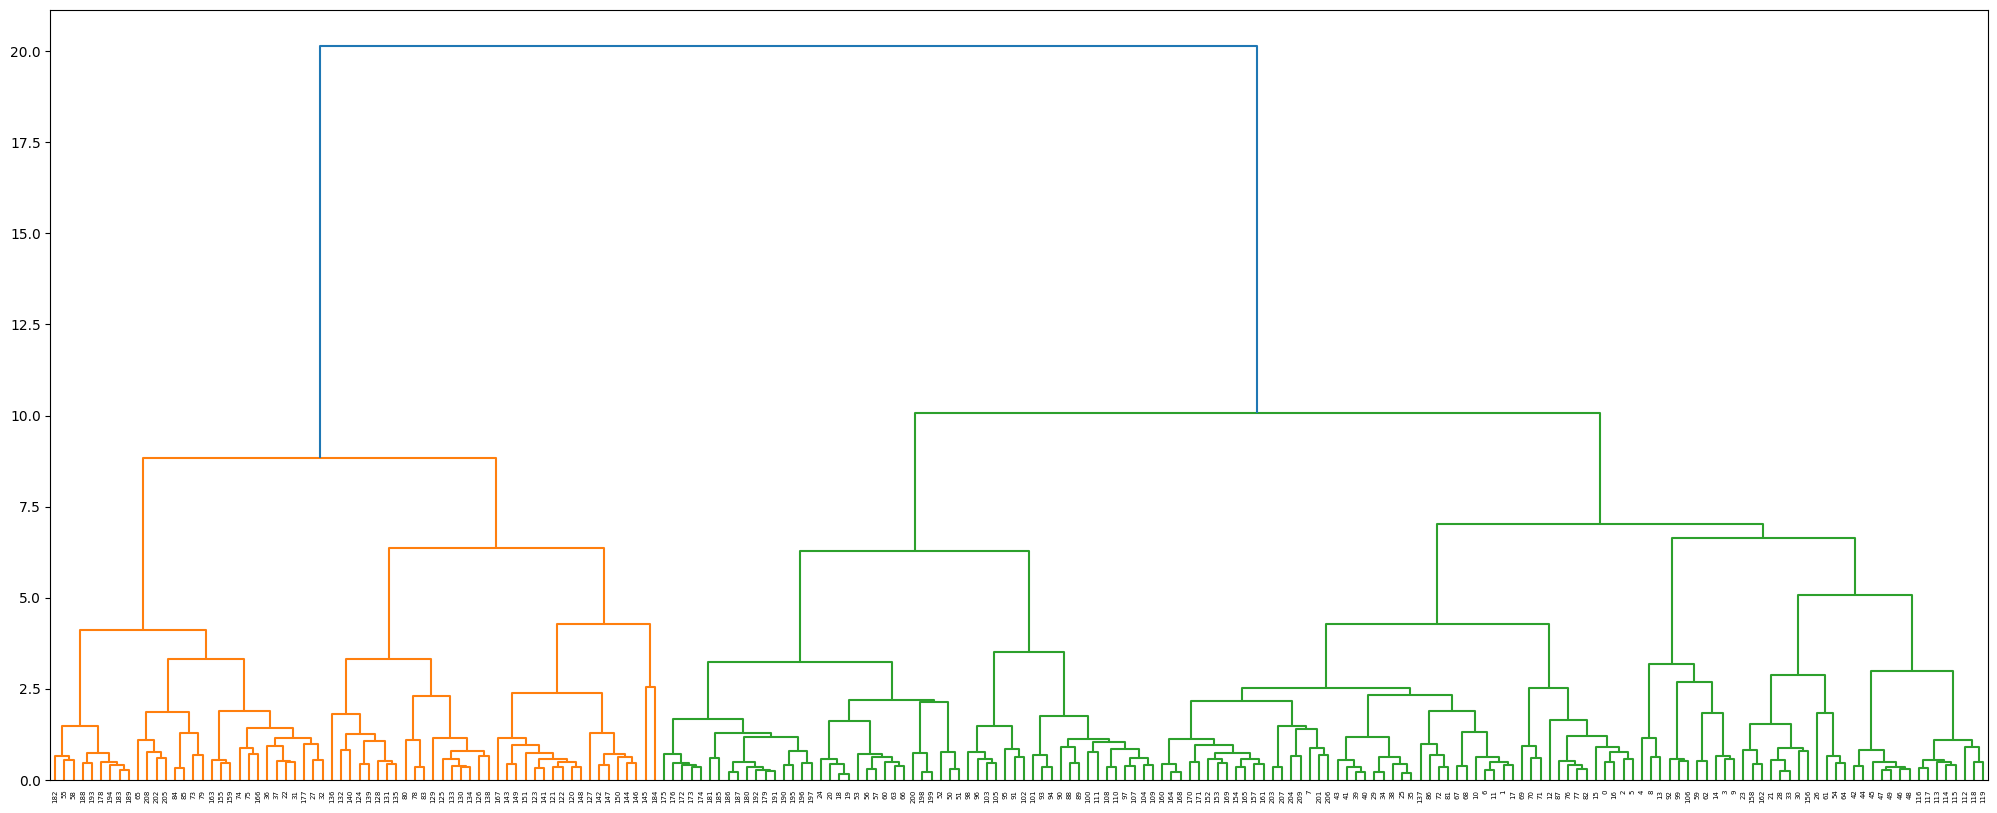

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Generate the linkage matrix using 'ward' method
Z2 = linkage(df_without_head, 'ward')

# Create a dendrogram
fig2 = plt.figure(figsize=(25, 10))
dn2 = dendrogram(Z2)

plt.show()

In [19]:
from scipy.cluster.hierarchy import fcluster

# Assign cluster labels based on the linkage matrix and a distance threshold
labels2 = fcluster(Z2, t=10, criterion='distance')

# Print cluster labels of each data point
[(f_list, labels) for f_list, labels in zip(f_list, labels2)], labels2

([('561-1-3-27-Z115_C-0000001.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000002.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000003.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000004.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000005.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000006.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000007.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000008.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000009.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000010.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000011.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000012.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000013.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000014.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000015.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000016.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000017.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000018.jpg.npy', 3),
  ('561-1-3-27-Z37_C-0000001.jpg.npy', 2),
  ('561-1-3-27-Z37_C-0000002.jpg.npy', 2),
  ('561-1-3-27-Z37_C-0000003.jpg.npy', 2),
  ('561-1-3-27-Z37_C-0000004.jpg.npy', 3),
  ('561-1-3-27-Z37_C-0000005.jpg.npy

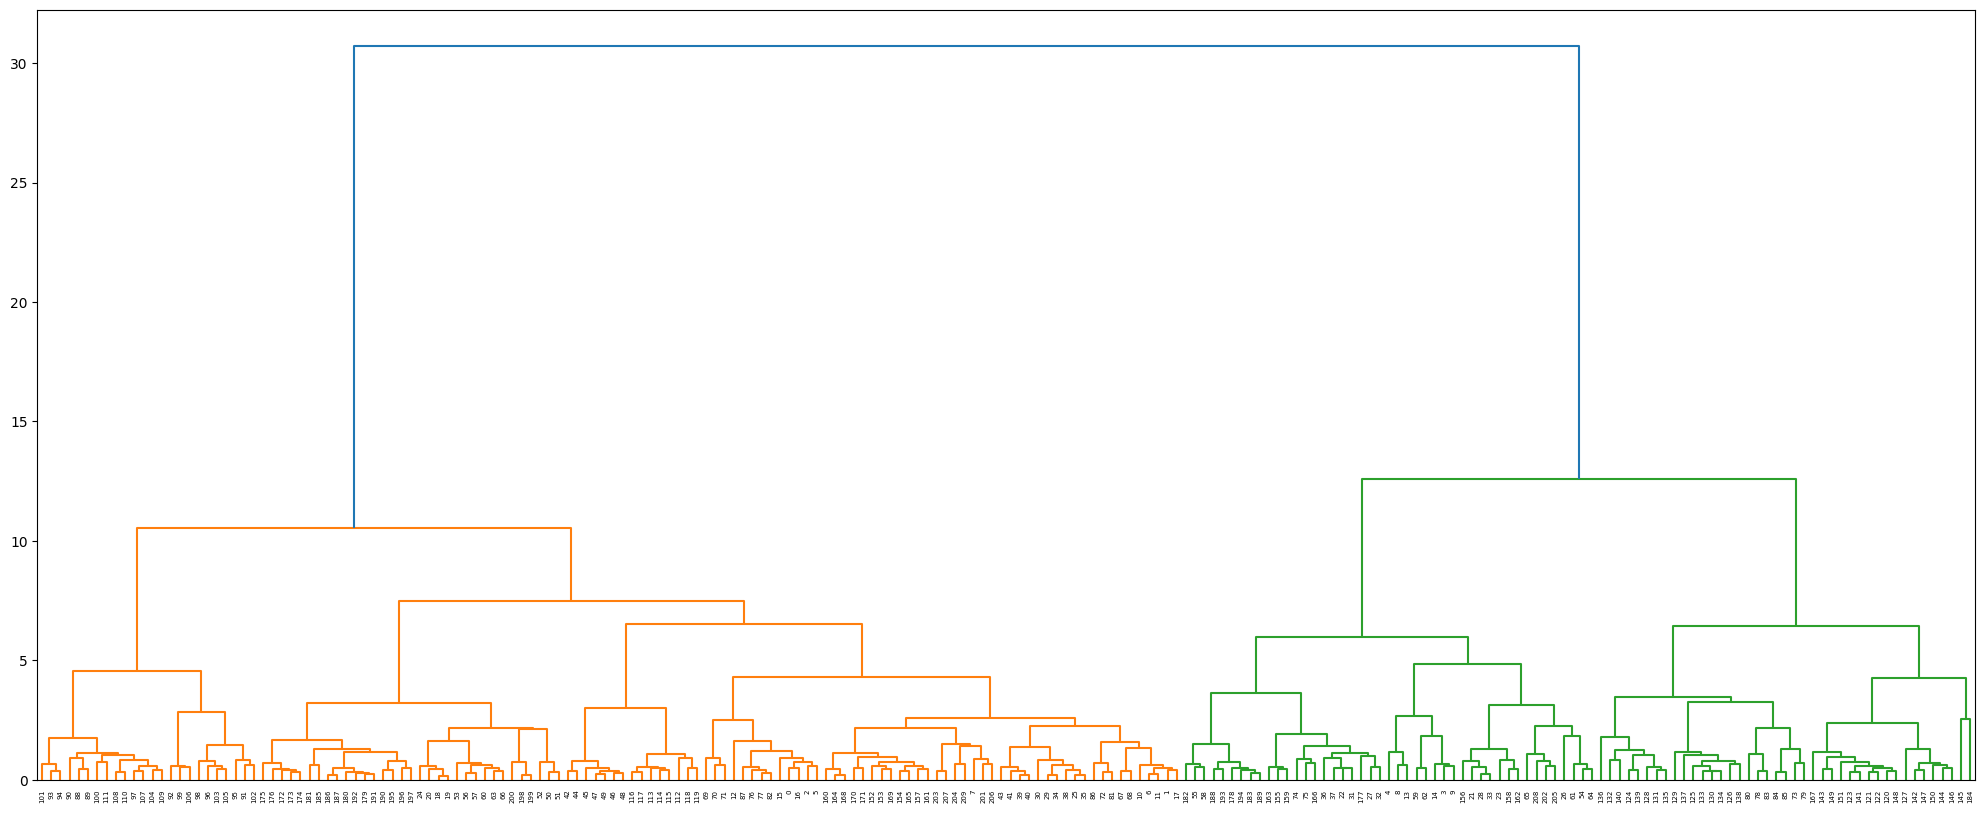

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Generate the linkage matrix using 'ward' method
Z3 = linkage(df_without_head, 'ward')

# Create a dendrogram
fig3 = plt.figure(figsize=(25, 10))
dn3 = dendrogram(Z3)

plt.show()

In [37]:
from scipy.cluster.hierarchy import fcluster

# Assign cluster labels based on the linkage matrix and a distance threshold
labels3 = fcluster(Z3, t=2, criterion='distance')

# Print cluster labels of each data point
[(f_list, labels) for f_list, labels in zip(f_list, labels3)], labels3

([('561-1-3-27-Z115_C-0000001.jpg.npy', 11),
  ('561-1-3-27-Z115_C-0000002.jpg.npy', 15),
  ('561-1-3-27-Z115_C-0000003.jpg.npy', 11),
  ('561-1-3-27-Z115_C-0000004.jpg.npy', 19),
  ('561-1-3-27-Z115_C-0000005.jpg.npy', 18),
  ('561-1-3-27-Z115_C-0000006.jpg.npy', 11),
  ('561-1-3-27-Z115_C-0000007.jpg.npy', 15),
  ('561-1-3-27-Z115_C-0000008.jpg.npy', 13),
  ('561-1-3-27-Z115_C-0000009.jpg.npy', 18),
  ('561-1-3-27-Z115_C-0000010.jpg.npy', 19),
  ('561-1-3-27-Z115_C-0000011.jpg.npy', 15),
  ('561-1-3-27-Z115_C-0000012.jpg.npy', 15),
  ('561-1-3-27-Z115_C-0000013.jpg.npy', 11),
  ('561-1-3-27-Z115_C-0000014.jpg.npy', 18),
  ('561-1-3-27-Z115_C-0000015.jpg.npy', 19),
  ('561-1-3-27-Z115_C-0000016.jpg.npy', 11),
  ('561-1-3-27-Z115_C-0000017.jpg.npy', 11),
  ('561-1-3-27-Z115_C-0000018.jpg.npy', 15),
  ('561-1-3-27-Z37_C-0000001.jpg.npy', 5),
  ('561-1-3-27-Z37_C-0000002.jpg.npy', 5),
  ('561-1-3-27-Z37_C-0000003.jpg.npy', 5),
  ('561-1-3-27-Z37_C-0000004.jpg.npy', 20),
  ('561-1-3-27-Z3

In [39]:
df_only_angle = df.copy().iloc[:, :additional_feature_count] # 4번째 컬럼까지만 데이터를 남겨 각도만 가지고 실행
df_only_angle

,angle_right_arm,angle_left_arm,xy_angle_right_arm,xy_angle_left_arm
0,0.917499,0.559228,0.966026,0.960071
1,0.949841,0.582094,0.986380,0.968911
2,0.803336,0.506141,0.874016,0.894725
3,0.895937,1.000000,0.686895,0.759025
4,0.668293,0.949822,0.697791,0.567850
...,...,...,...,...
205,0.277803,0.667340,0.311819,0.220569
206,0.759646,0.552117,0.811441,0.777074
207,0.870177,0.599952,0.873865,0.864226
208,0.182705,0.533775,0.390360,0.263371


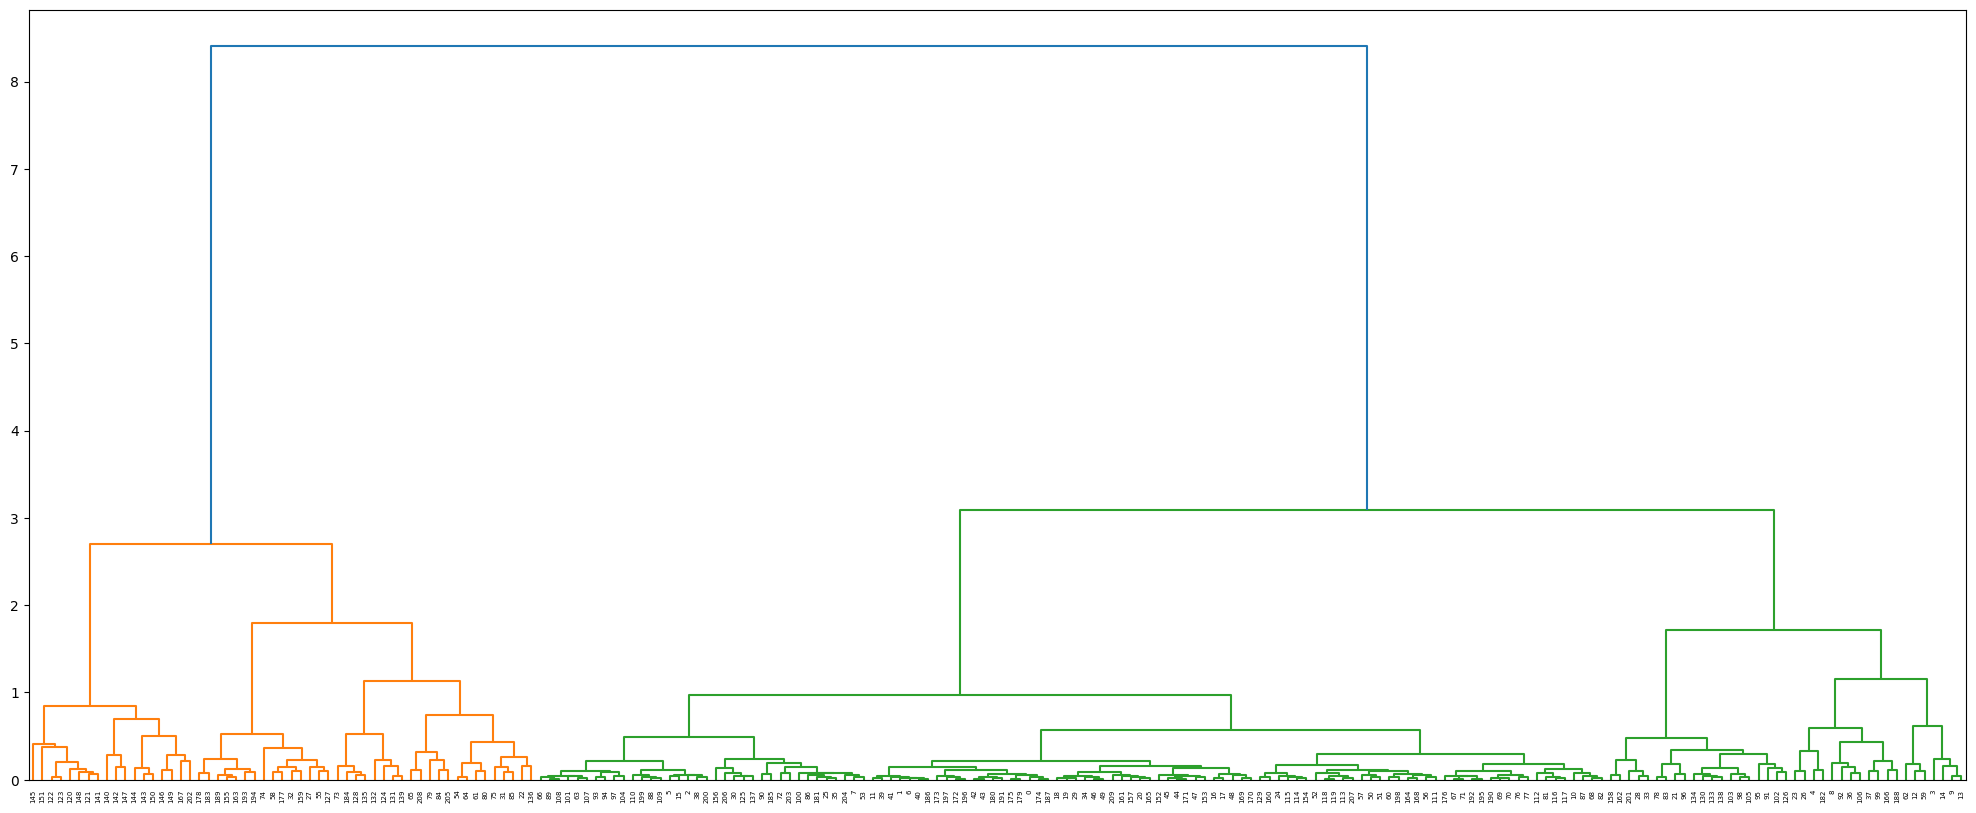

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Generate the linkage matrix using 'ward' method
Z4 = linkage(df_only_angle, 'ward')

# Create a dendrogram
fig4 = plt.figure(figsize=(25, 10))
dn4 = dendrogram(Z4)

plt.show()

In [41]:
from scipy.cluster.hierarchy import fcluster

# Assign cluster labels based on the linkage matrix and a distance threshold
labels4 = fcluster(Z4, t=2, criterion='distance')

# Print cluster labels of each data point
[(f_list, labels) for f_list, labels in zip(f_list, labels4)], labels4

([('561-1-3-27-Z115_C-0000001.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000002.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000003.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000004.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000005.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000006.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000007.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000008.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000009.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000010.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000011.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000012.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000013.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000014.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000015.jpg.npy', 4),
  ('561-1-3-27-Z115_C-0000016.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000017.jpg.npy', 3),
  ('561-1-3-27-Z115_C-0000018.jpg.npy', 3),
  ('561-1-3-27-Z37_C-0000001.jpg.npy', 3),
  ('561-1-3-27-Z37_C-0000002.jpg.npy', 3),
  ('561-1-3-27-Z37_C-0000003.jpg.npy', 3),
  ('561-1-3-27-Z37_C-0000004.jpg.npy', 4),
  ('561-1-3-27-Z37_C-0000005.jpg.npy

In [43]:
# labels를 df에 추가
df_only_angle['labels'] = labels4
df_only_angle

,angle_right_arm,angle_left_arm,xy_angle_right_arm,xy_angle_left_arm,labels
0,0.917499,0.559228,0.966026,0.960071,3
1,0.949841,0.582094,0.986380,0.968911,3
2,0.803336,0.506141,0.874016,0.894725,3
3,0.895937,1.000000,0.686895,0.759025,4
4,0.668293,0.949822,0.697791,0.567850,4
...,...,...,...,...,...
205,0.277803,0.667340,0.311819,0.220569,2
206,0.759646,0.552117,0.811441,0.777074,3
207,0.870177,0.599952,0.873865,0.864226,3
208,0.182705,0.533775,0.390360,0.263371,2


In [45]:
df_only_angle['labels'] = df_only_angle['labels'].replace(3, 0) # 팔이 곧은 데이터에 붙은 라벨을 0으로 변경
df_only_angle['labels'] = df_only_angle['labels'].replace(4, 3) # 팔이 약간 구부러진 데이터에 붙은 라벨을 3으로 변경

In [46]:
df_only_angle.to_csv("./230924_00h40m_train_scaled_with_label_only_angle_ver.csv", index=False)
df_only_angle

,angle_right_arm,angle_left_arm,xy_angle_right_arm,xy_angle_left_arm,labels
0,0.917499,0.559228,0.966026,0.960071,0
1,0.949841,0.582094,0.986380,0.968911,0
2,0.803336,0.506141,0.874016,0.894725,0
3,0.895937,1.000000,0.686895,0.759025,3
4,0.668293,0.949822,0.697791,0.567850,3
...,...,...,...,...,...
205,0.277803,0.667340,0.311819,0.220569,2
206,0.759646,0.552117,0.811441,0.777074,0
207,0.870177,0.599952,0.873865,0.864226,0
208,0.182705,0.533775,0.390360,0.263371,2
